# Data Understanding Feature Engineering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

After performing the feature engineering, we go on with another data understanding on the new features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

import os
import sys
sys.path.append(os.path.abspath('../src'))
from utils import *

In [2]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589739 entries, 0 to 589738
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   cyclist_url                  589739 non-null  object        
 1   cyclist_name                 589739 non-null  object        
 2   birth_year                   589739 non-null  int64         
 3   weight                       480007 non-null  float64       
 4   height                       480007 non-null  float64       
 5   nationality                  589739 non-null  object        
 6   race_url                     589739 non-null  object        
 7   race_name                    589739 non-null  object        
 8   points                       589739 non-null  float64       
 9   uci_points                   422184 non-null  float64       
 10  length                       589739 non-null  float64       
 11  climb_total               

In [4]:
dataset.describe()

birth_year         weight         height         points  \
count  589739.000000  480007.000000  480007.000000  589739.000000   
mean     1977.683221      68.362072     179.699850      89.225897   
min      1933.000000      48.000000     154.000000      18.000000   
25%      1970.000000      64.000000     175.000000      50.000000   
50%      1979.000000      68.000000     180.000000      80.000000   
75%      1986.000000      73.000000     184.000000     100.000000   
max      2004.000000      94.000000     204.000000     350.000000   
std        11.537102       6.182201       6.269585      54.415806   

          uci_points         length    climb_total        profile  \
count  422184.000000  589739.000000  475338.000000  475338.000000   
mean       70.663263     166.776291       2.321865       2.585028   
min         6.000000       1.000000       0.002000       1.000000   
25%        16.000000     152.500000       1.289000       1.000000   
50%        20.000000     178.200000       2.243000       2.000000   
75%       100.000000     203.500000       3.260000       4.000000   
max       800.000000     338.000000       6.974000       5.000000   
std       120.160957      64.543335       1.381120       1.502340   

       startlist_quality                           date  ...  \
count      589739.000000                         589739  ...   
mean         1101.182822  2006-08-12 17:05:13.698772224  ...   
min           115.000000            1970-02-28 00:00:00  ...   
25%           844.000000            1999-07-18 00:00:00  ...   
50%           988.000000            2008-05-03 00:00:00  ...   
75%          1309.000000            2015-08-29 00:00:00  ...   
max          2047.000000            2023-07-29 00:00:00  ...   
std           380.588233                            NaN  ...   

       race_physical_effort  race_prestige  mean_cyclist_cp     mean_delta  \
count         475338.000000  589739.000000    583883.000000  589739.000000   
mean               0.153683       0.157926         0.002392     430.755887   
min                0.000000       0.000000         0.000000       0.000000   
25%                0.029436       0.074522         0.000753     289.071429   
50%                0.095036       0.113960         0.001729     410.167155   
75%                0.233487       0.240693         0.002995     539.835106   
max                1.000000       1.000000         0.131387    7291.800000   
std                0.162824       0.117017         0.004627     195.827602   

       mean_position  previous_mean_position  previous_mean_delta  \
count  589739.000000           589739.000000        589739.000000   
mean        0.499960                0.503710           396.553131   
min         0.000000                0.000000             0.000000   
25%         0.414957                0.407196           249.380528   
50%         0.499364                0.501505           370.370482   
75%         0.590683                0.596949           504.064478   
max         1.000000                1.000000         25223.000000   
std         0.129950                0.138826           229.731076   

       previous_mean_cp  cyclist_previous_experience  num_participants  
count      4.026860e+05                471243.000000     589739.000000  
mean       3.000112e-03                     0.268439        149.417829  
min        2.950171e-07                     0.000158          1.000000  
25%        1.126681e-03                     0.079681        135.000000  
50%        1.955246e-03                     0.208122        158.000000  
75%        3.455072e-03                     0.403588        174.000000  
max        2.828866e-01                     1.000000        210.000000  
std        5.491022e-03                     0.229919         38.033633  

[8 rows x 28 columns]

### BMI Attribute

Text(5.069444444444445, 0.5, 'Count')

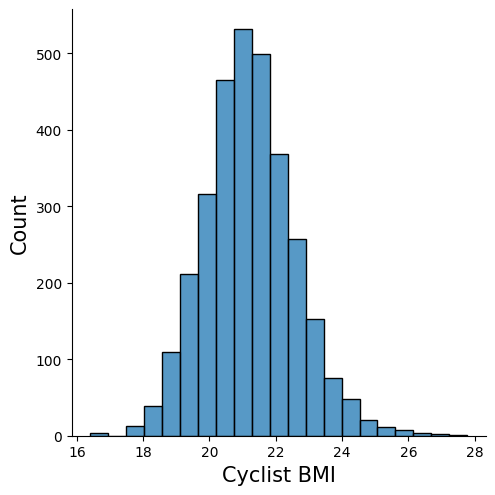

In [5]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_bmi', 'cyclist_url']), 
                x="cyclist_bmi", 
                kind="hist",
                row_order="desc",
                bins=n_bins)
plt.xlabel('Cyclist BMI', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Cyclist Age Group')

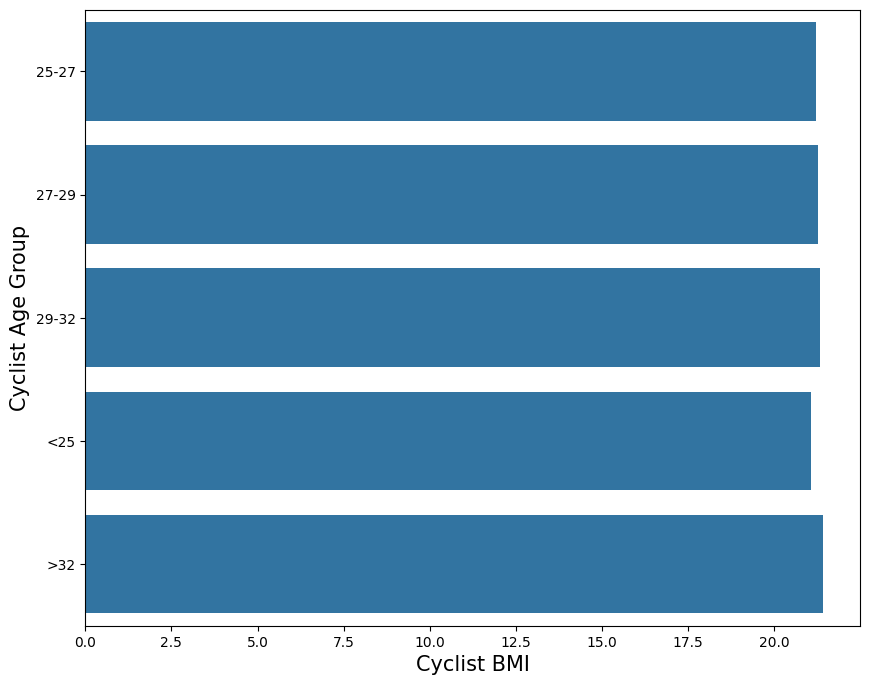

In [6]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset['cyclist_age_group'],
    'cyclist_bmi': dataset['cyclist_bmi'],
    'team': dataset['cyclist_team'],
    'cyclist_url': dataset['cyclist_url'],
    'nationality': dataset['nationality'],
    'race_name': dataset['race_name'],
    'race_prestige': dataset['race_prestige'],
    'year': dataset['date'].dt.year,
}).drop_duplicates(subset=['cyclist_url', 'race_name', 'year']) # Consider every cyclist only once for each edition of the race

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_bmi'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_bmi', data=tmp_mean[tmp_mean['cyclist_bmi'].notnull()], orient='h')

plt.xlabel('Cyclist BMI', fontsize=15)
plt.ylabel('Cyclist Age Group', fontsize=15)

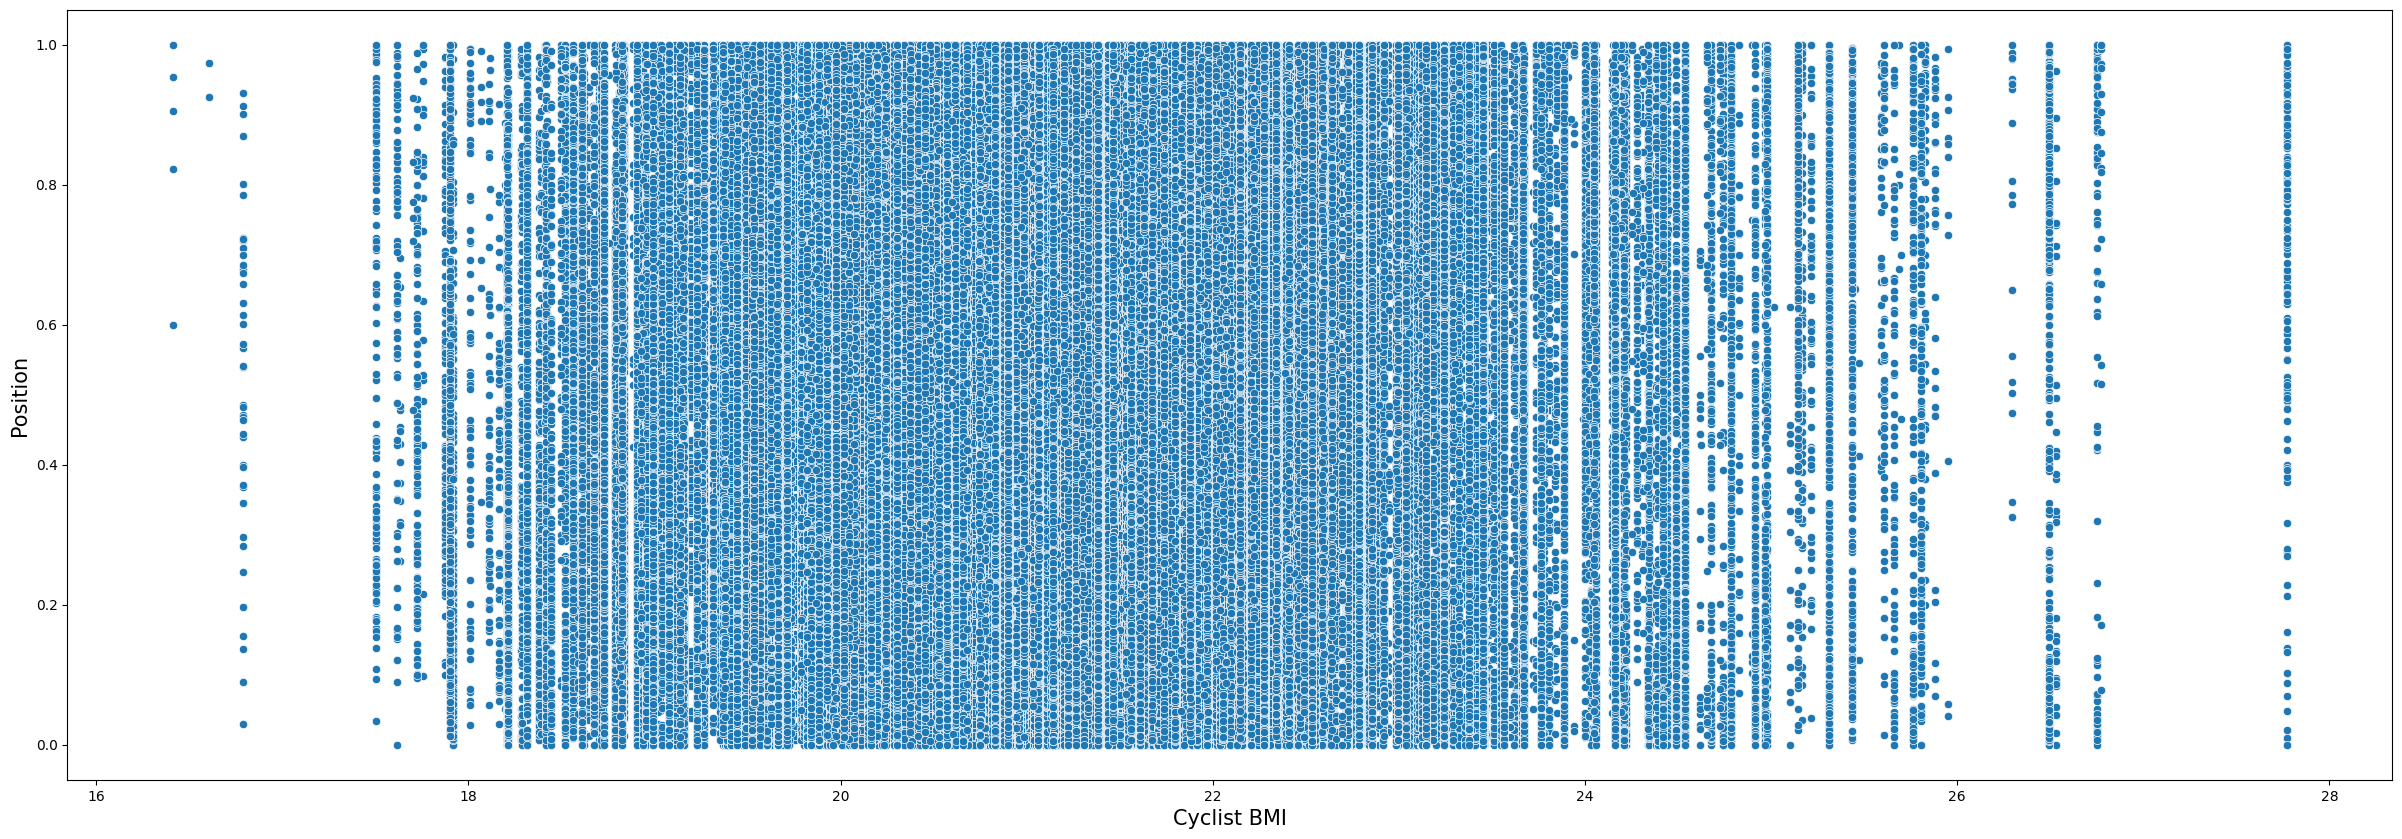

In [7]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_bmi',
    y='position',
    data=dataset)
plt.xlabel('Cyclist BMI', fontsize=15)
plt.ylabel('Position', fontsize=15)
plt.show()

There doesn't appear to be a clear or strong relationship between the variables being analyzed.

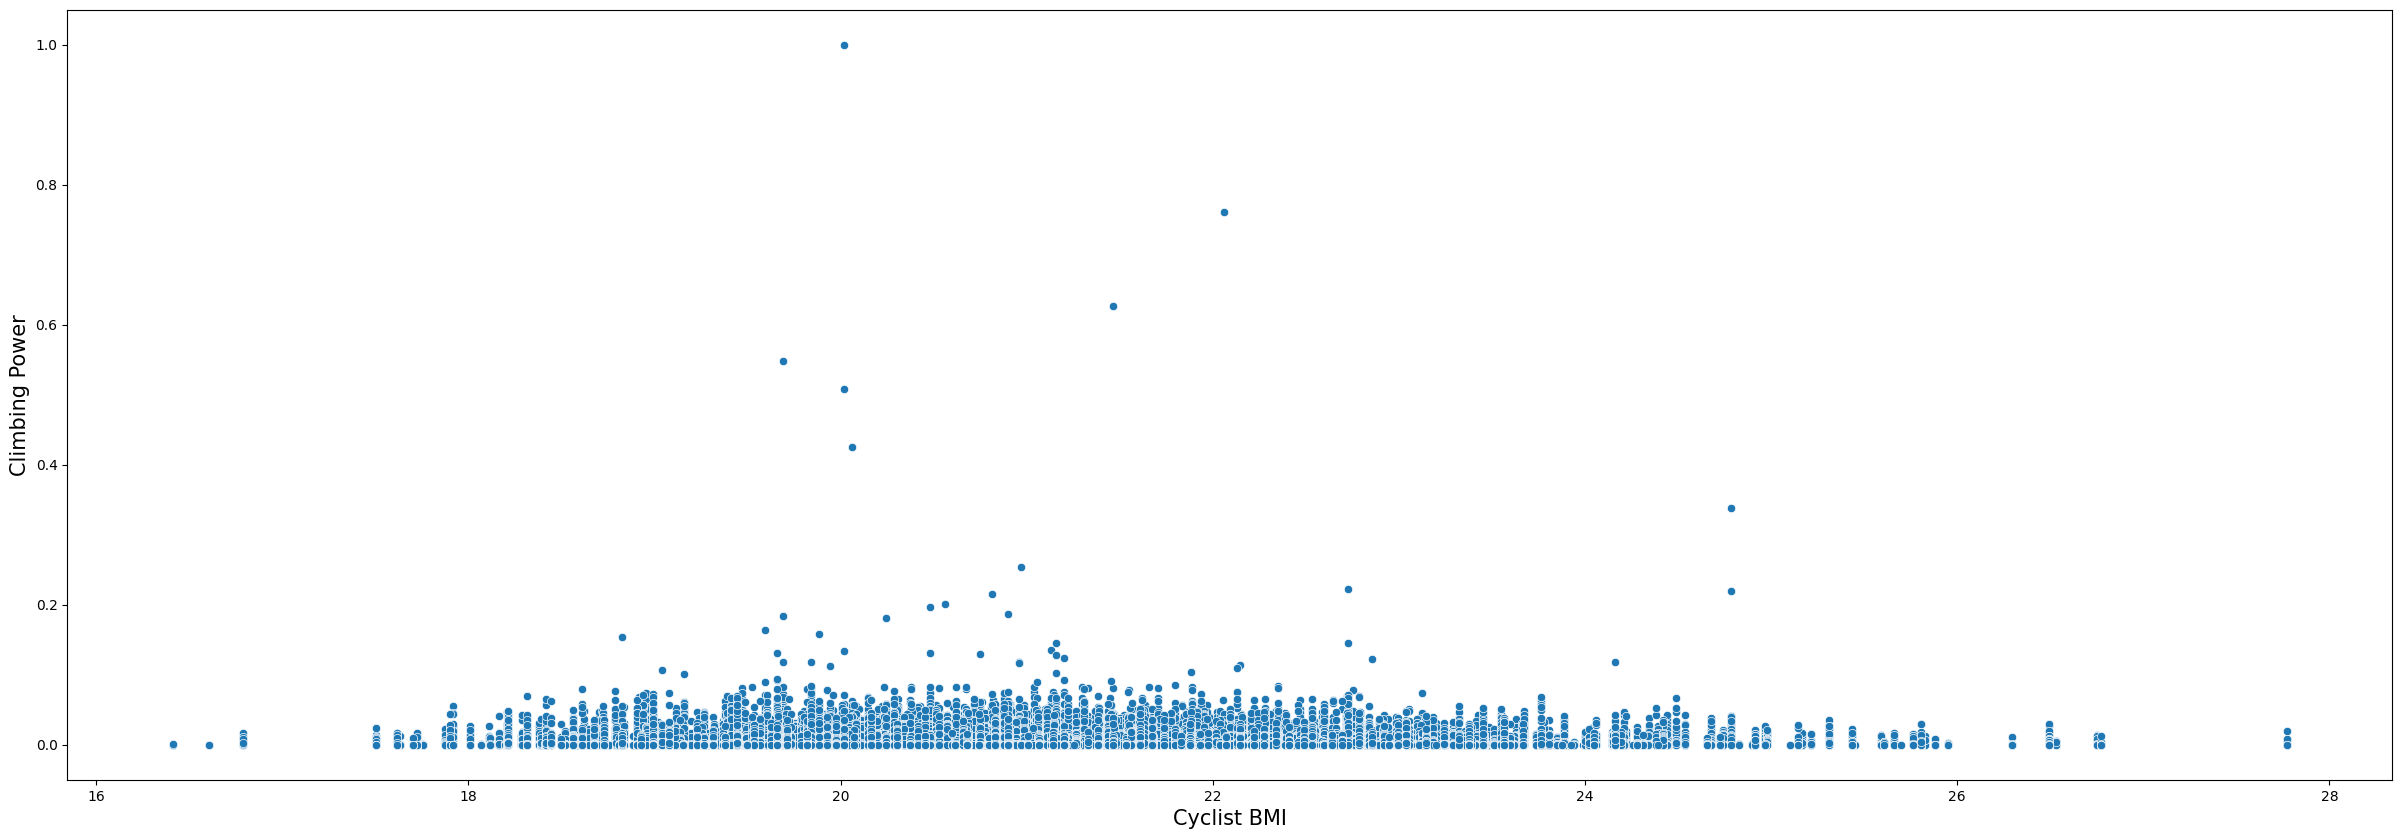

In [8]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_bmi',
    y='cyclist_climb_power',
    data=dataset)
plt.xlabel('Cyclist BMI', fontsize=15)
plt.ylabel('Climbing Power', fontsize=15)
plt.show()

From this distribution we can notice the bell shape, where a medium BMI seems to allow for higher power outputs.

In [9]:
tmp_df.groupby('team')['cyclist_bmi'].describe()

count       mean       std        min  \
team                                                                           
ag2r-prevoyance-2001                  1072.0  21.419181  1.370057  17.617725   
atala-1985                             523.0  21.454217  1.362540  17.915089   
atala-campagnolo-1983                  735.0  21.212145  1.353612  18.206645   
atala-ofmega-1988                      320.0  21.159366  1.229889  18.206645   
australia-1983                         738.0  21.288382  1.370986  17.901235   
...                                      ...        ...       ...        ...   
united-states-1998                    1010.0  20.982776  1.312672  18.214936   
ville-de-charleroi-new-systems-2000   1119.0  21.290073  1.254712  18.166204   
vini-fantini-2013                      531.0  21.147115  1.384059  18.209877   
vini-ricordi-pinarello-sidermec-1986   985.0  21.438069  1.304930  18.312854   
watney-avia-1972                       943.0  21.280058  1.322409  18.559557   

                                            25%        50%        75%  \
team                                                                    
ag2r-prevoyance-2001                  20.515086  21.457612  22.205990   
atala-1985                            20.654142  21.385936  22.160665   
atala-campagnolo-1983                 20.233553  21.132713  22.145329   
atala-ofmega-1988                     20.305175  21.144004  22.038401   
australia-1983                        20.305175  21.200991  22.145329   
...                                         ...        ...        ...   
united-states-1998                    20.134769  20.826851  21.877551   
ville-de-charleroi-new-systems-2000   20.515086  21.203105  21.913580   
vini-fantini-2013                     20.244898  21.132713  22.038401   
vini-ricordi-pinarello-sidermec-1986  20.654142  21.366869  22.068809   
watney-avia-1972                      20.354768  21.306818  22.204082   

                                            max  
team                                             
ag2r-prevoyance-2001                  25.880571  
atala-1985                            26.528510  
atala-campagnolo-1983                 25.805363  
atala-ofmega-1988                     23.483477  
australia-1983                        25.762981  
...                                         ...  
united-states-1998                    24.828593  
ville-de-charleroi-new-systems-2000   26.528510  
vini-fantini-2013                     26.296567  
vini-ricordi-pinarello-sidermec-1986  25.661152  
watney-avia-1972                      24.968010  

[91 rows x 8 columns]

In [10]:
tmp_df.groupby('nationality')['cyclist_bmi'].describe()

count       mean       std        min        25%        50%  \
nationality                                                                 
Albania         6.0  23.291230  0.000000  23.291230  23.291230  23.291230   
Algeria        12.0  23.323418  0.000000  23.323418  23.323418  23.323418   
Argentina     133.0  21.347946  1.053120  19.713322  19.713322  21.705129   
Australia    3018.0  21.707712  1.254587  18.559557  20.957274  21.678807   
Austria      1022.0  20.669090  1.086567  18.836565  20.006569  20.338326   
...             ...        ...       ...        ...        ...        ...   
Uruguay        13.0  20.614406  0.353547  20.428357  20.428357  20.428357   
Uzbekistan     51.0  23.288232  1.075557  20.987654  23.781213  23.781213   
Venezuela     103.0  20.316719  1.146805  18.289895  19.591837  20.756387   
Yugoslavia      0.0        NaN       NaN        NaN        NaN        NaN   
Zimbabwe        0.0        NaN       NaN        NaN        NaN        NaN   

                   75%        max  
nationality                        
Albania      23.291230  23.291230  
Algeria      23.323418  23.323418  
Argentina    21.705129  23.456790  
Australia    22.530864  24.897060  
Austria      21.389756  22.724403  
...                ...        ...  
Uruguay      20.428357  21.234568  
Uzbekistan   23.781213  23.781213  
Venezuela    20.756387  24.163265  
Yugoslavia         NaN        NaN  
Zimbabwe           NaN        NaN  

[72 rows x 8 columns]

### Age-Group Attribute

Text(-12.430555555555555, 0.5, 'Count')

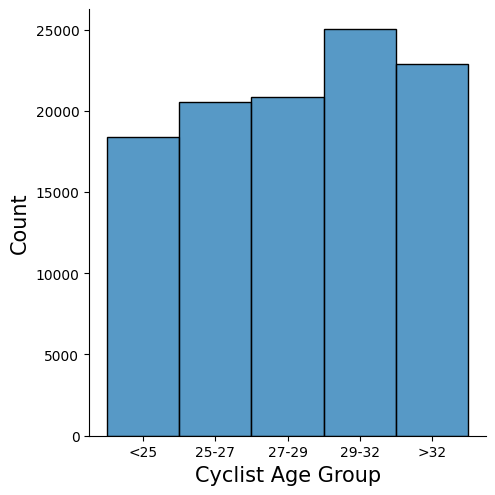

In [11]:
n_bins = dataset['cyclist_age_group'].nunique()

sb.displot(dataset[['cyclist_url', 'race_name', 'race_year', 'cyclist_age_group']].drop_duplicates(subset=['cyclist_url', 'race_name', 'race_year']), 
                x="cyclist_age_group", 
                kind="hist",
                row_order="desc",
                bins=n_bins)
plt.xlabel('Cyclist Age Group', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [12]:
dataset.groupby('cyclist_age_group')['position'].describe()

count      mean       std  min       25%       50%  \
cyclist_age_group                                                          
25-27              112242.0  0.504367  0.296338  0.0  0.243386  0.507692   
27-29              115093.0  0.490425  0.294065  0.0  0.232258  0.484694   
29-32              140295.0  0.485822  0.289610  0.0  0.235294  0.479290   
<25                 91500.0  0.530404  0.294949  0.0  0.275862  0.545977   
>32                130608.0  0.498432  0.282108  0.0  0.260355  0.497175   

                        75%  max  
cyclist_age_group                 
25-27              0.765349  1.0  
27-29              0.746193  1.0  
29-32              0.734177  1.0  
<25                0.790541  1.0  
>32                0.736842  1.0

In general, older is better, with the best age group being 29-32.

In [13]:
tmp_df = dataset.drop_duplicates(subset=['race_name', 'race_year', 'cyclist_url'])
pd.crosstab(tmp_df['cyclist_age_group'], tmp_df['race_season'], normalize='index')

race_season          autumn    spring    summer    winter
cyclist_age_group                                        
25-27              0.044070  0.464925  0.207478  0.283528
27-29              0.039927  0.460480  0.213440  0.286153
29-32              0.041513  0.458847  0.211166  0.288474
<25                0.052540  0.467965  0.197542  0.281954
>32                0.039258  0.450479  0.196901  0.313362

We can say that the youngest age group is more frequent in autumn and spring periods, while the middle age groups (27-29, 29-32) are most frequent in summer. The oldest age group (> 32) is most frequent in winter.

Text(0, 0.5, 'Startlist Quality')

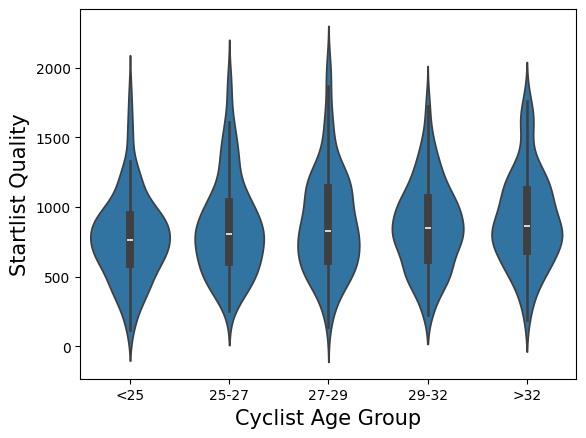

In [56]:
sb.violinplot(
    data=tmp_df,
    x='cyclist_age_group',
    y='startlist_quality')
plt.xlabel('Cyclist Age Group', fontsize=15)
plt.ylabel('Startlist Quality', fontsize=15)

In [15]:
tmp_df.groupby('cyclist_age_group')['startlist_quality'].describe()

count        mean         std    min    25%    50%  \
cyclist_age_group                                                         
25-27              20513.0  960.108663  340.406777  115.0  737.0  917.0   
27-29              20863.0  975.901165  338.638341  115.0  754.0  928.0   
29-32              25004.0  987.272636  329.682274  115.0  766.0  943.0   
<25                18386.0  909.591755  319.022402  115.0  704.0  869.0   
>32                22849.0  975.534465  314.205485  115.0  764.0  935.0   

                      75%     max  
cyclist_age_group                  
25-27              1148.0  2047.0  
27-29              1158.0  2047.0  
29-32              1165.0  2047.0  
<25                1084.0  2047.0  
>32                1140.0  2047.0

The trend of the startlist quality seems to be correlated with the increase in age up to the 29-32 age group, after which it appears to decline.

Text(0, 0.5, 'Points')

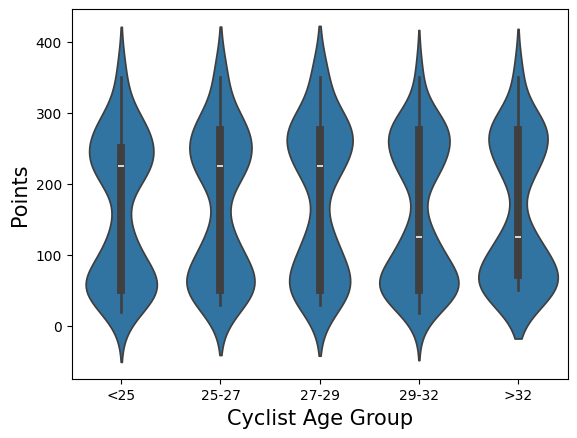

In [57]:
sb.violinplot(
    data=tmp_df,
    x='cyclist_age_group',
    y='points')
plt.xlabel('Cyclist Age Group', fontsize=15)
plt.ylabel('Points', fontsize=15)

In [17]:
tmp_df.groupby('cyclist_age_group')['points'].describe()

count        mean        std   min   25%    50%    75%  \
cyclist_age_group                                                             
25-27              20513.0  151.707259  98.734522  18.0  50.0  100.0  225.0   
27-29              20863.0  150.562048  98.781073  18.0  50.0  100.0  225.0   
29-32              25004.0  152.082547  99.129032  18.0  50.0  100.0  275.0   
<25                18386.0  151.432557  98.645674  18.0  50.0  100.0  225.0   
>32                22849.0  148.806731  98.618328  18.0  50.0  100.0  225.0   

                     max  
cyclist_age_group         
25-27              350.0  
27-29              350.0  
29-32              350.0  
<25                350.0  
>32                350.0

There doesn't seem to be a strong correlation between the points associated with the races and the age of the cyclists, which further proves that the points are not linked with the startlist quality.

Text(0, 0.5, 'Race Prestige')

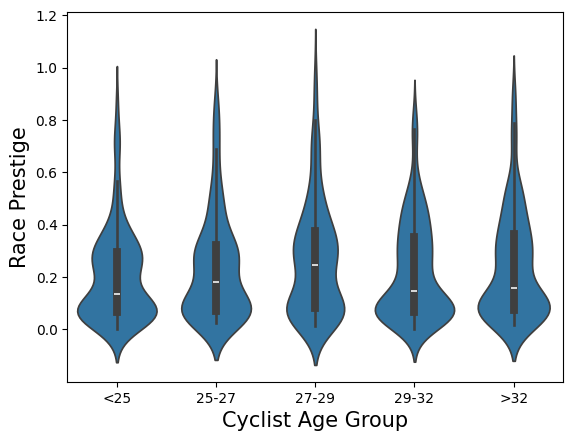

In [58]:
sb.violinplot(
    data=tmp_df,
    x='cyclist_age_group',
    y='race_prestige')
plt.xlabel('Cyclist Age Group', fontsize=15)
plt.ylabel('Race Prestige', fontsize=15)

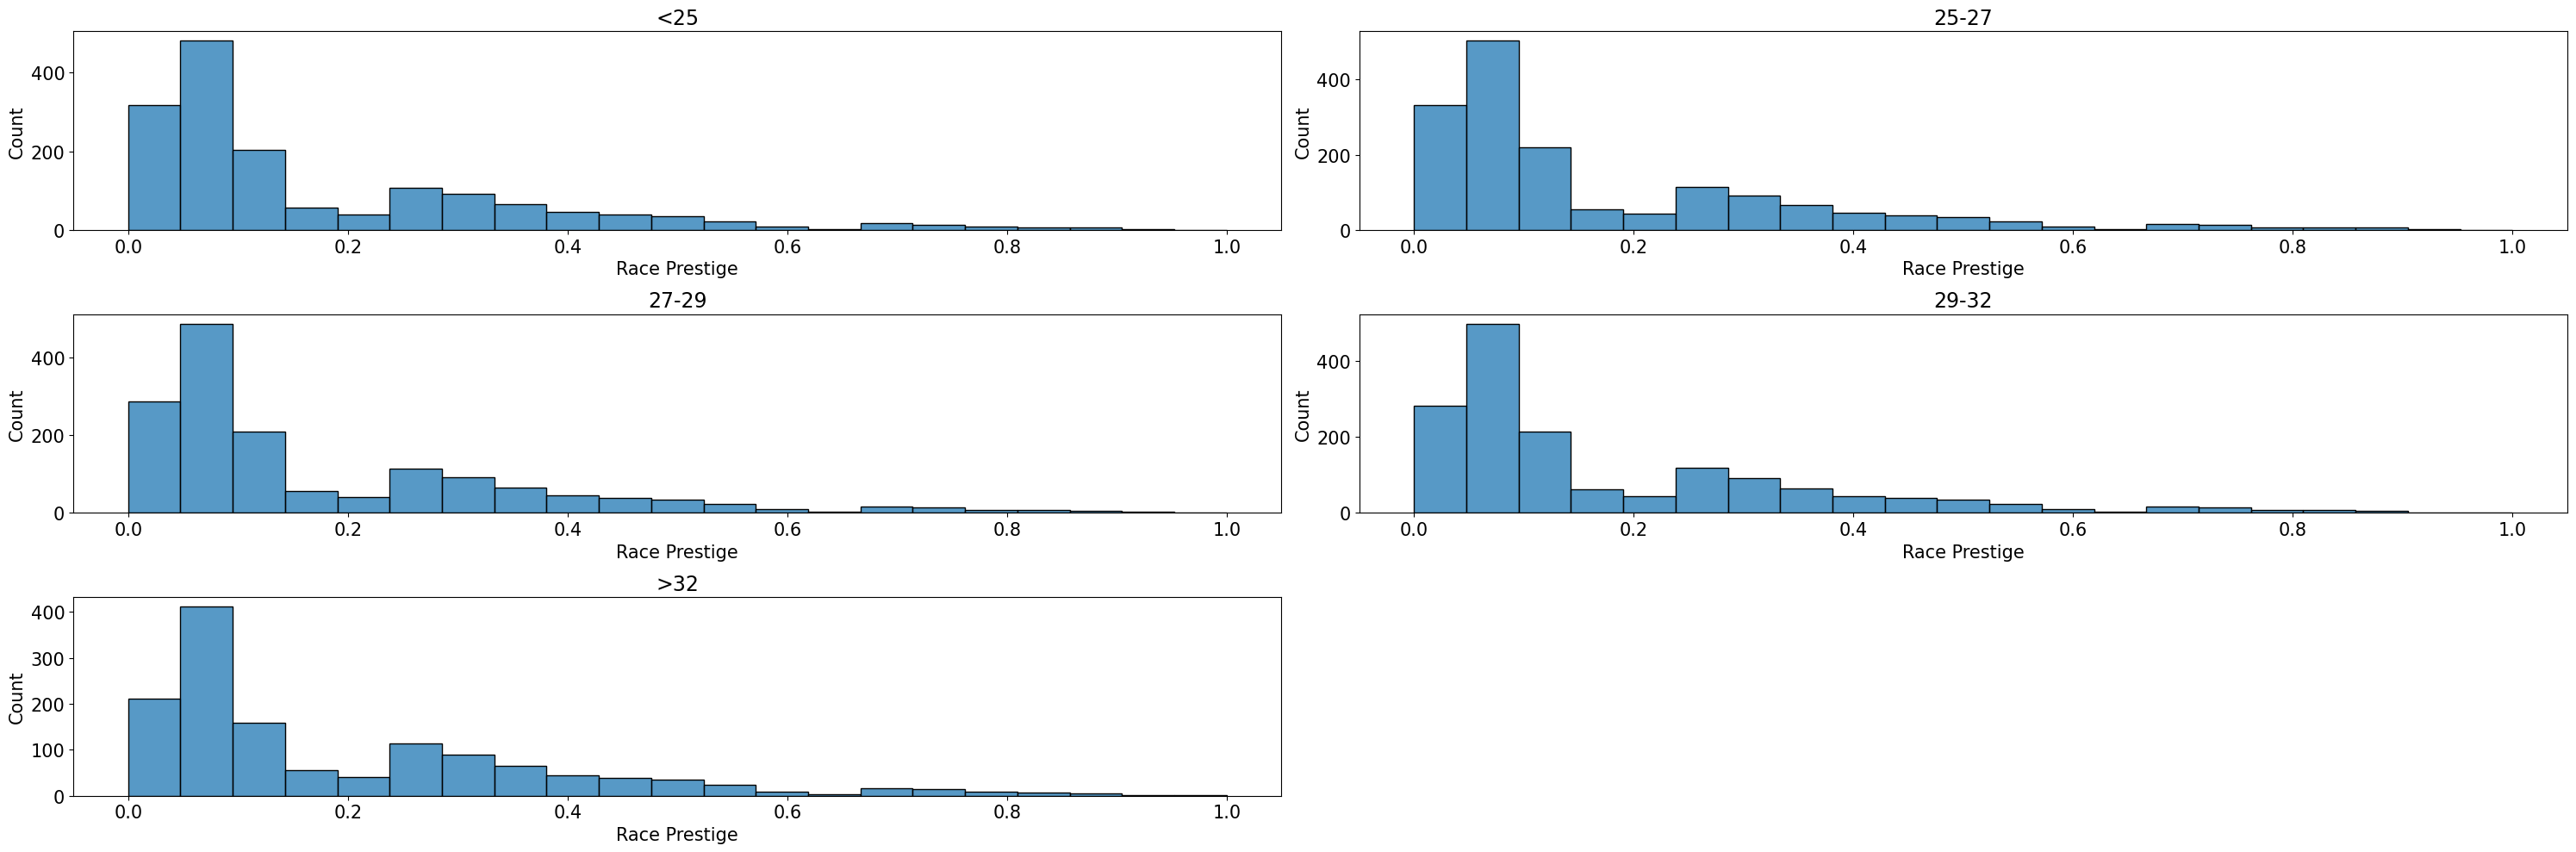

In [19]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)
fig, ax = plt.subplots(3, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['cyclist_age_group'] == '<25'].drop_duplicates(subset=['race_name', 'race_stage', 'race_year']), 
            x="race_prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0,0].set_title('<25', fontsize=17)
ax[0,0].set_xlabel('Race Prestige', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['cyclist_age_group'] == '25-27'].drop_duplicates(subset=['race_name', 'race_stage', 'race_year']), 
            x="race_prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0,1].set_title('25-27', fontsize=17)
ax[0,1].set_xlabel('Race Prestige', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['cyclist_age_group'] == '27-29'].drop_duplicates(subset=['race_name', 'race_stage', 'race_year']), 
            x="race_prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1,0].set_title('27-29', fontsize=17)
ax[1,0].set_xlabel('Race Prestige', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['cyclist_age_group'] == '29-32'].drop_duplicates(subset=['race_name', 'race_stage', 'race_year']), 
            x="race_prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1,1].set_title('29-32', fontsize=17)
ax[1,1].set_xlabel('Race Prestige', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['cyclist_age_group'] == '>32'].drop_duplicates(subset=['race_name', 'race_stage', 'race_year']), 
            x="race_prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[2, 0])
ax[2,0].set_title('>32', fontsize=17) 
ax[2,0].set_xlabel('Race Prestige', fontsize=15)
ax[2,0].set_ylabel('Count', fontsize=15)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)

fig.delaxes(ax[2, 1]) # Remove empty subplot

plt.tight_layout()
plt.show()

In [20]:
pd.crosstab(tmp_df['cyclist_team'], tmp_df['cyclist_age_group'], normalize='index')

cyclist_age_group                        25-27     27-29     29-32       <25  \
cyclist_team                                                                   
ag2r-prevoyance-2001                  0.200158  0.148148  0.234043  0.171789   
atala-1985                            0.239370  0.152756  0.253543  0.179528   
atala-campagnolo-1983                 0.159236  0.235669  0.189809  0.191083   
atala-ofmega-1988                     0.143302  0.224299  0.242991  0.183801   
australia-1983                        0.203797  0.163291  0.212658  0.165823   
...                                        ...       ...       ...       ...   
united-states-1998                    0.173561  0.164568  0.239209  0.188849   
ville-de-charleroi-new-systems-2000   0.164965  0.201100  0.277298  0.136685   
vini-fantini-2013                     0.245283  0.231132  0.215409  0.165094   
vini-ricordi-pinarello-sidermec-1986  0.183817  0.198769  0.237467  0.145998   
watney-avia-1972                      0.185849  0.172642  0.204717  0.201887   

cyclist_age_group                          >32  
cyclist_team                                    
ag2r-prevoyance-2001                  0.245863  
atala-1985                            0.174803  
atala-campagnolo-1983                 0.224204  
atala-ofmega-1988                     0.205607  
australia-1983                        0.254430  
...                                        ...  
united-states-1998                    0.233813  
ville-de-charleroi-new-systems-2000   0.219953  
vini-fantini-2013                     0.143082  
vini-ricordi-pinarello-sidermec-1986  0.233949  
watney-avia-1972                      0.234906  

[91 rows x 5 columns]

### Climb-Power Attribute

Text(-12.430555555555555, 0.5, 'Count')

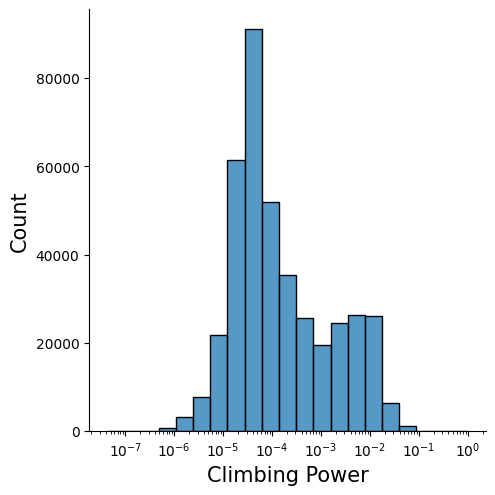

In [21]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_climb_power', 'cyclist_url', 'date']), 
                x="cyclist_climb_power", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)
plt.xlabel('Climbing Power', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Cyclist Age Group')

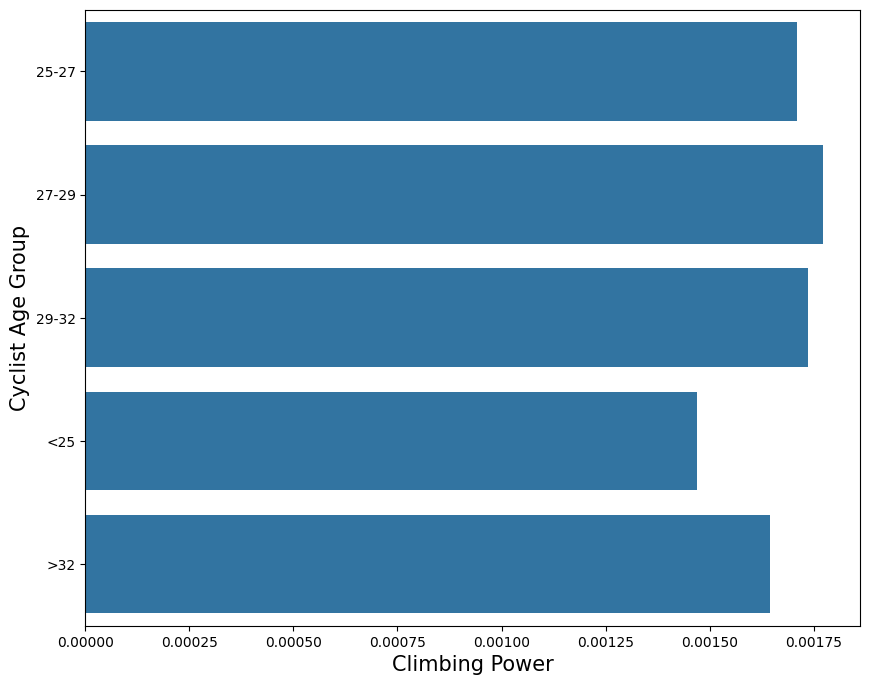

In [22]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset[dataset['profile'] > 2]['cyclist_age_group'],
    'cyclist_climb_power': dataset[dataset['profile'] > 2]['cyclist_climb_power'],
})

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_climb_power'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(
    y='cyclist_age_group',
    x='cyclist_climb_power',
    data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()],
    orient='h')
plt.xlabel('Climbing Power', fontsize=15)
plt.ylabel('Cyclist Age Group', fontsize=15)

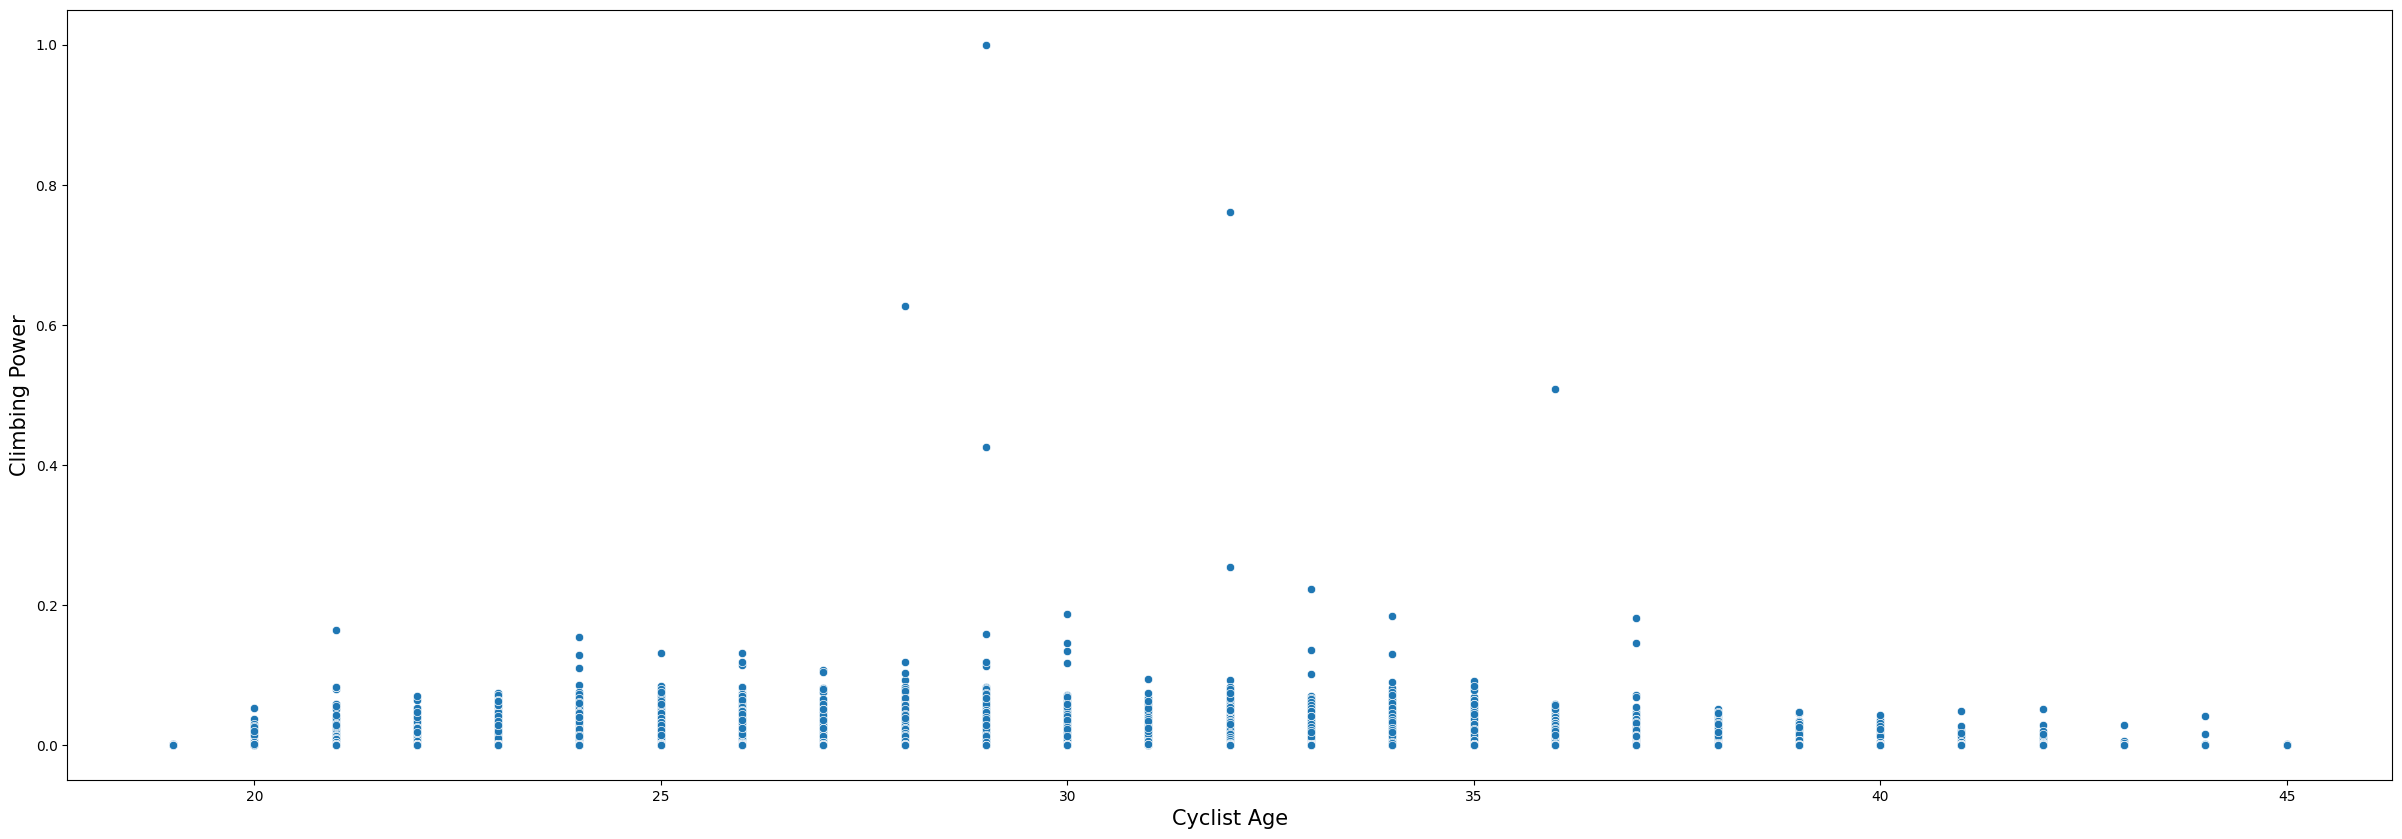

In [23]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_age',
    y='cyclist_climb_power',
    data=dataset[dataset['profile'] > 2])
plt.xlabel('Cyclist Age', fontsize=15)
plt.ylabel('Climbing Power', fontsize=15)
plt.show()

The trend of points distribution shows an initial increase, reaching a peak, and then a subsequent decrease. This pattern suggests that there is a certain range where the points are maximized before declining again.

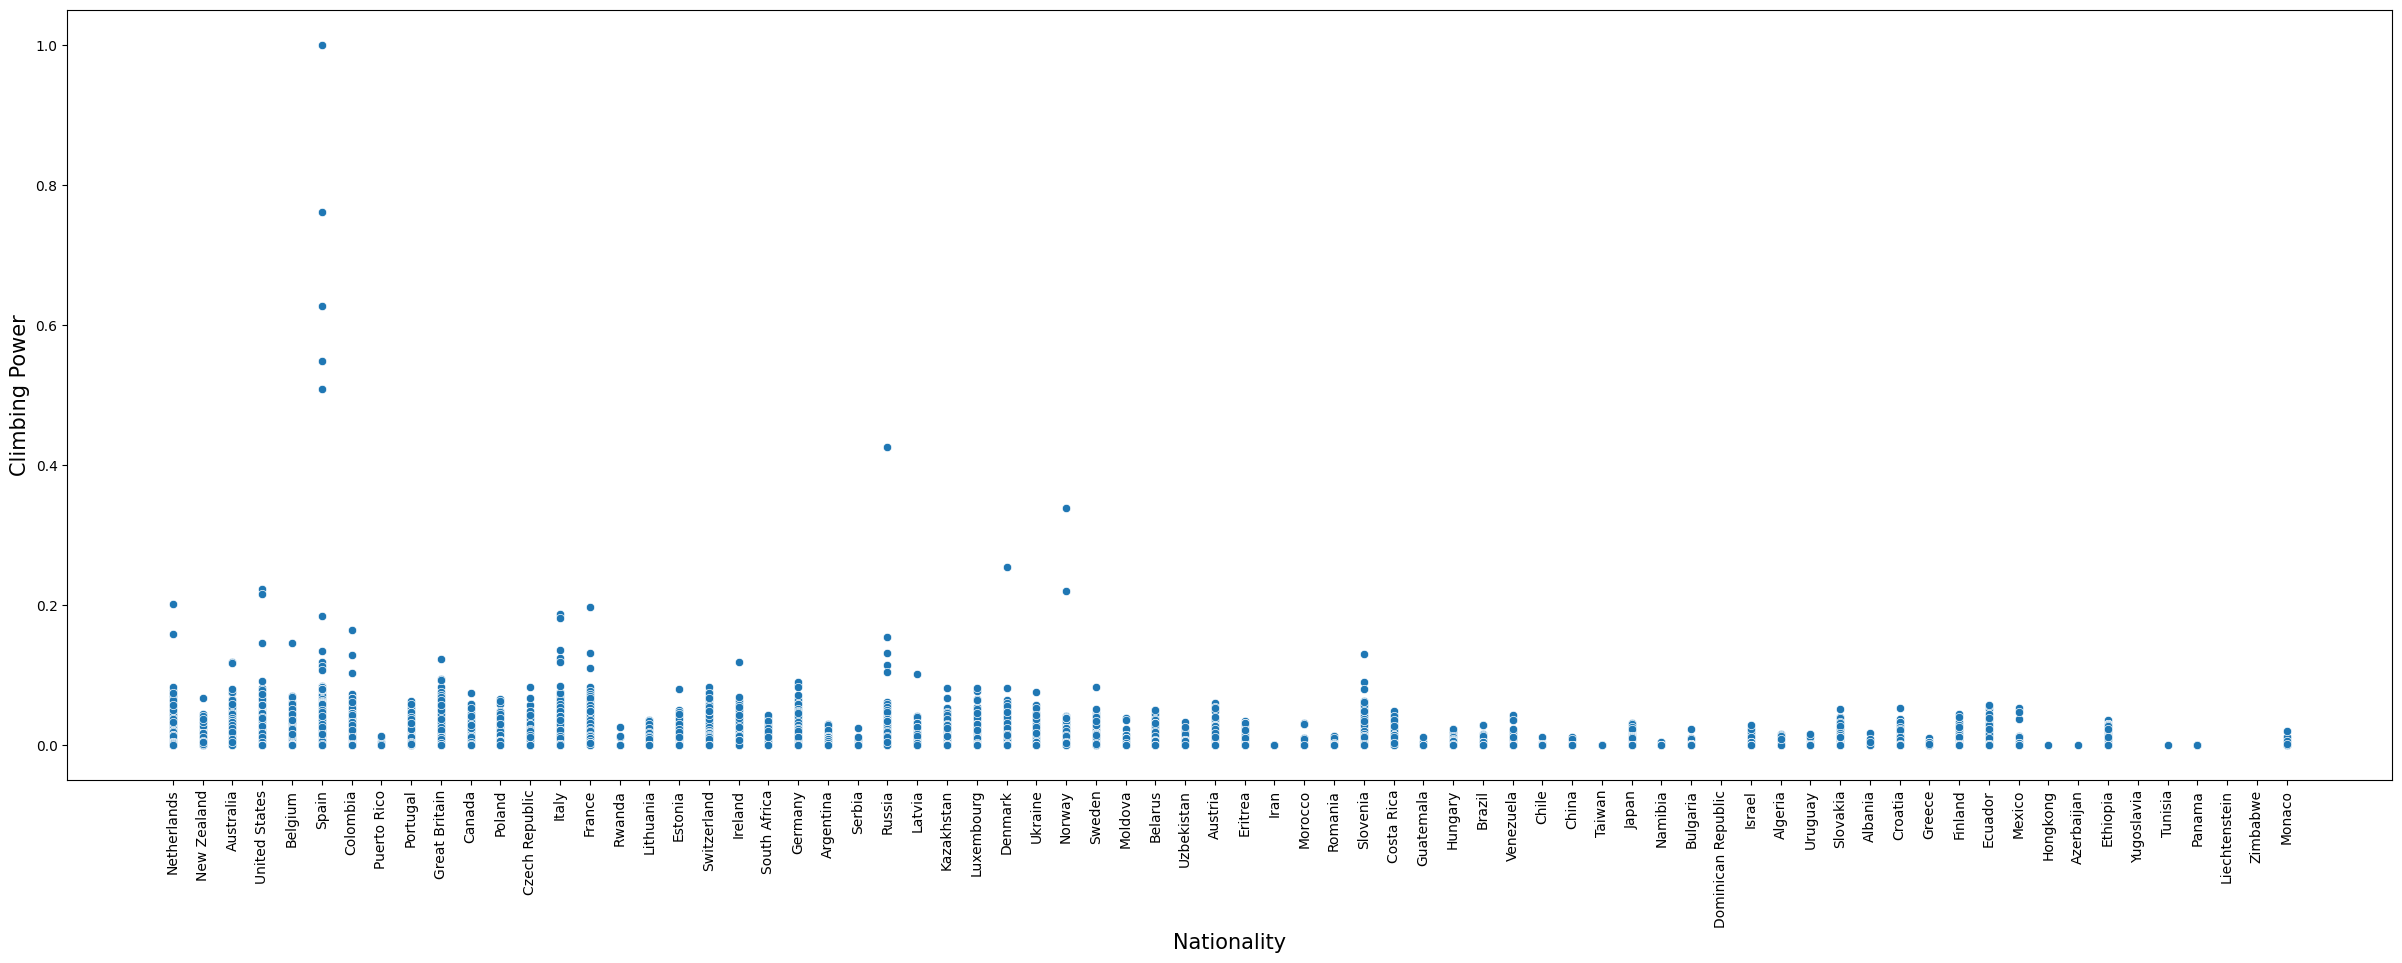

In [24]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='nationality',
    y='cyclist_climb_power',
    data=dataset)
plt.xticks(rotation=90)
plt.xlabel('Nationality', fontsize=15)
plt.ylabel('Climbing Power', fontsize=15)
plt.show()

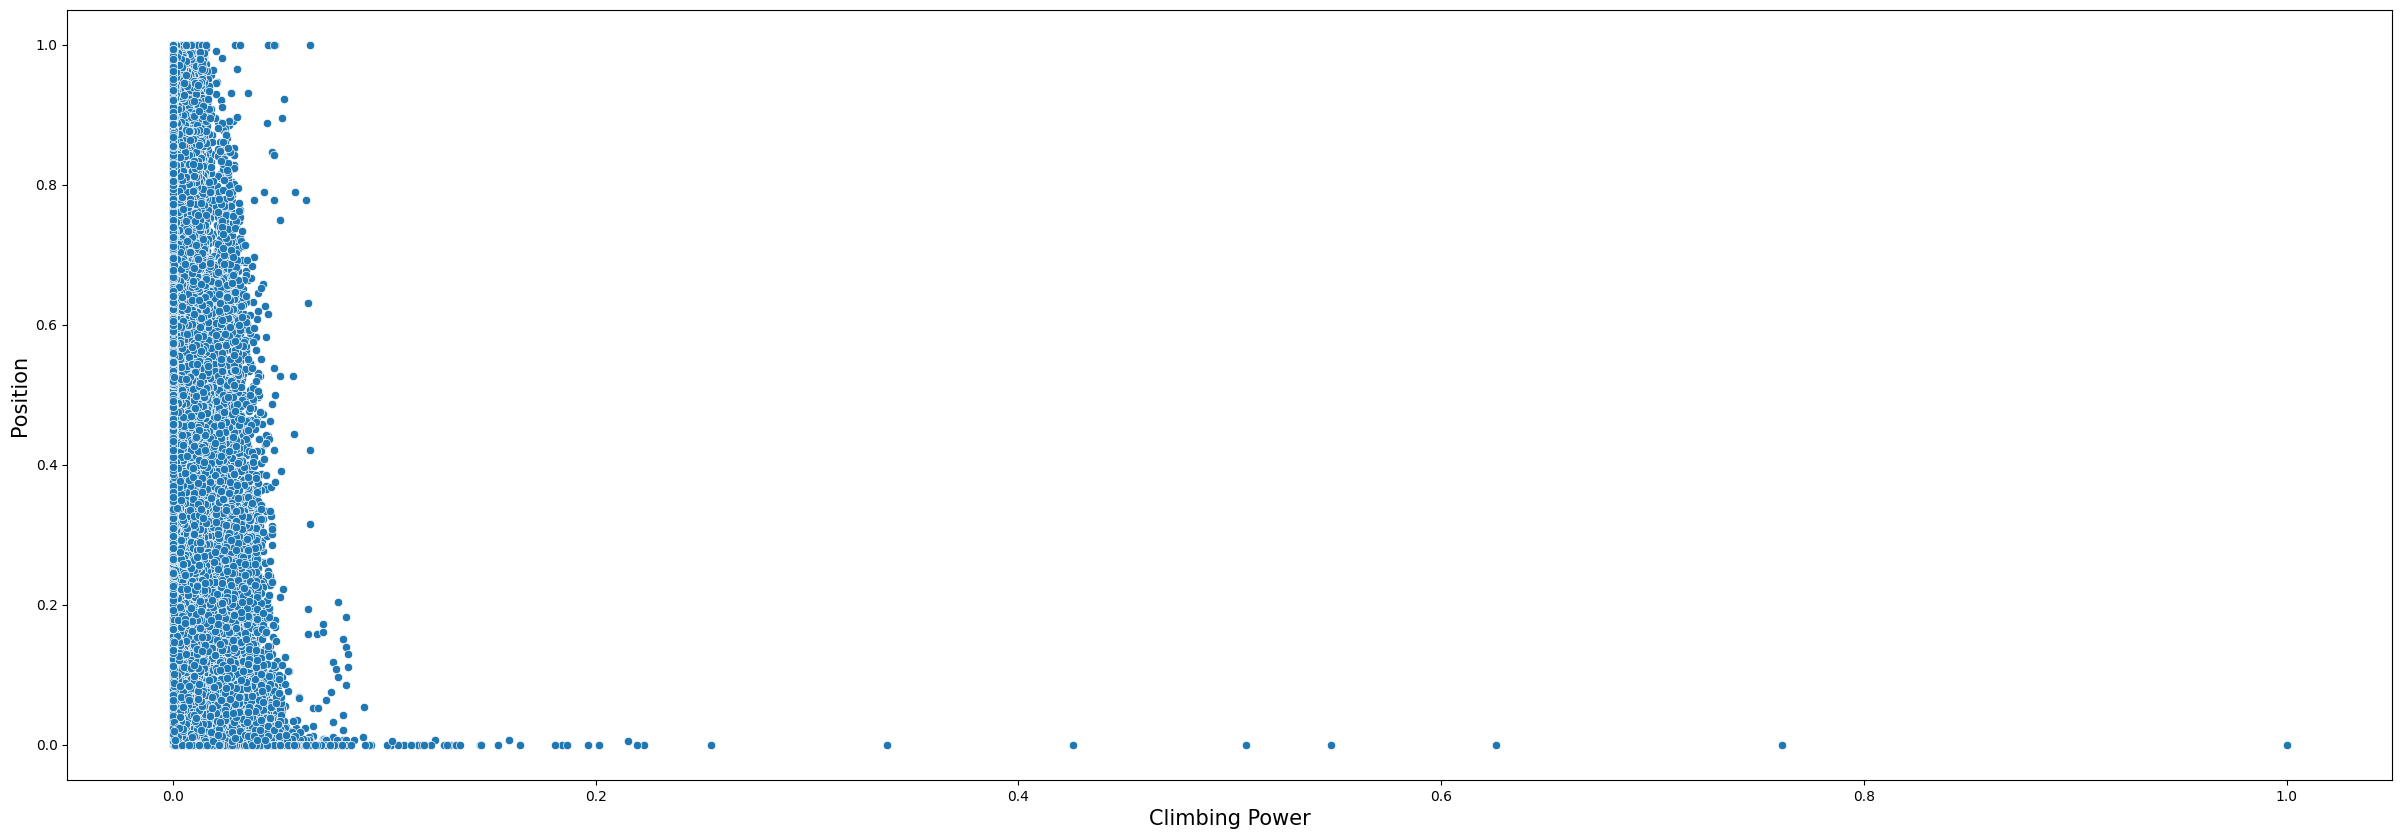

In [25]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_climb_power',
    y='position',
    data=dataset)
plt.xlabel('Climbing Power', fontsize=15)
plt.ylabel('Position', fontsize=15)
plt.show()

We have a low climb power on flat

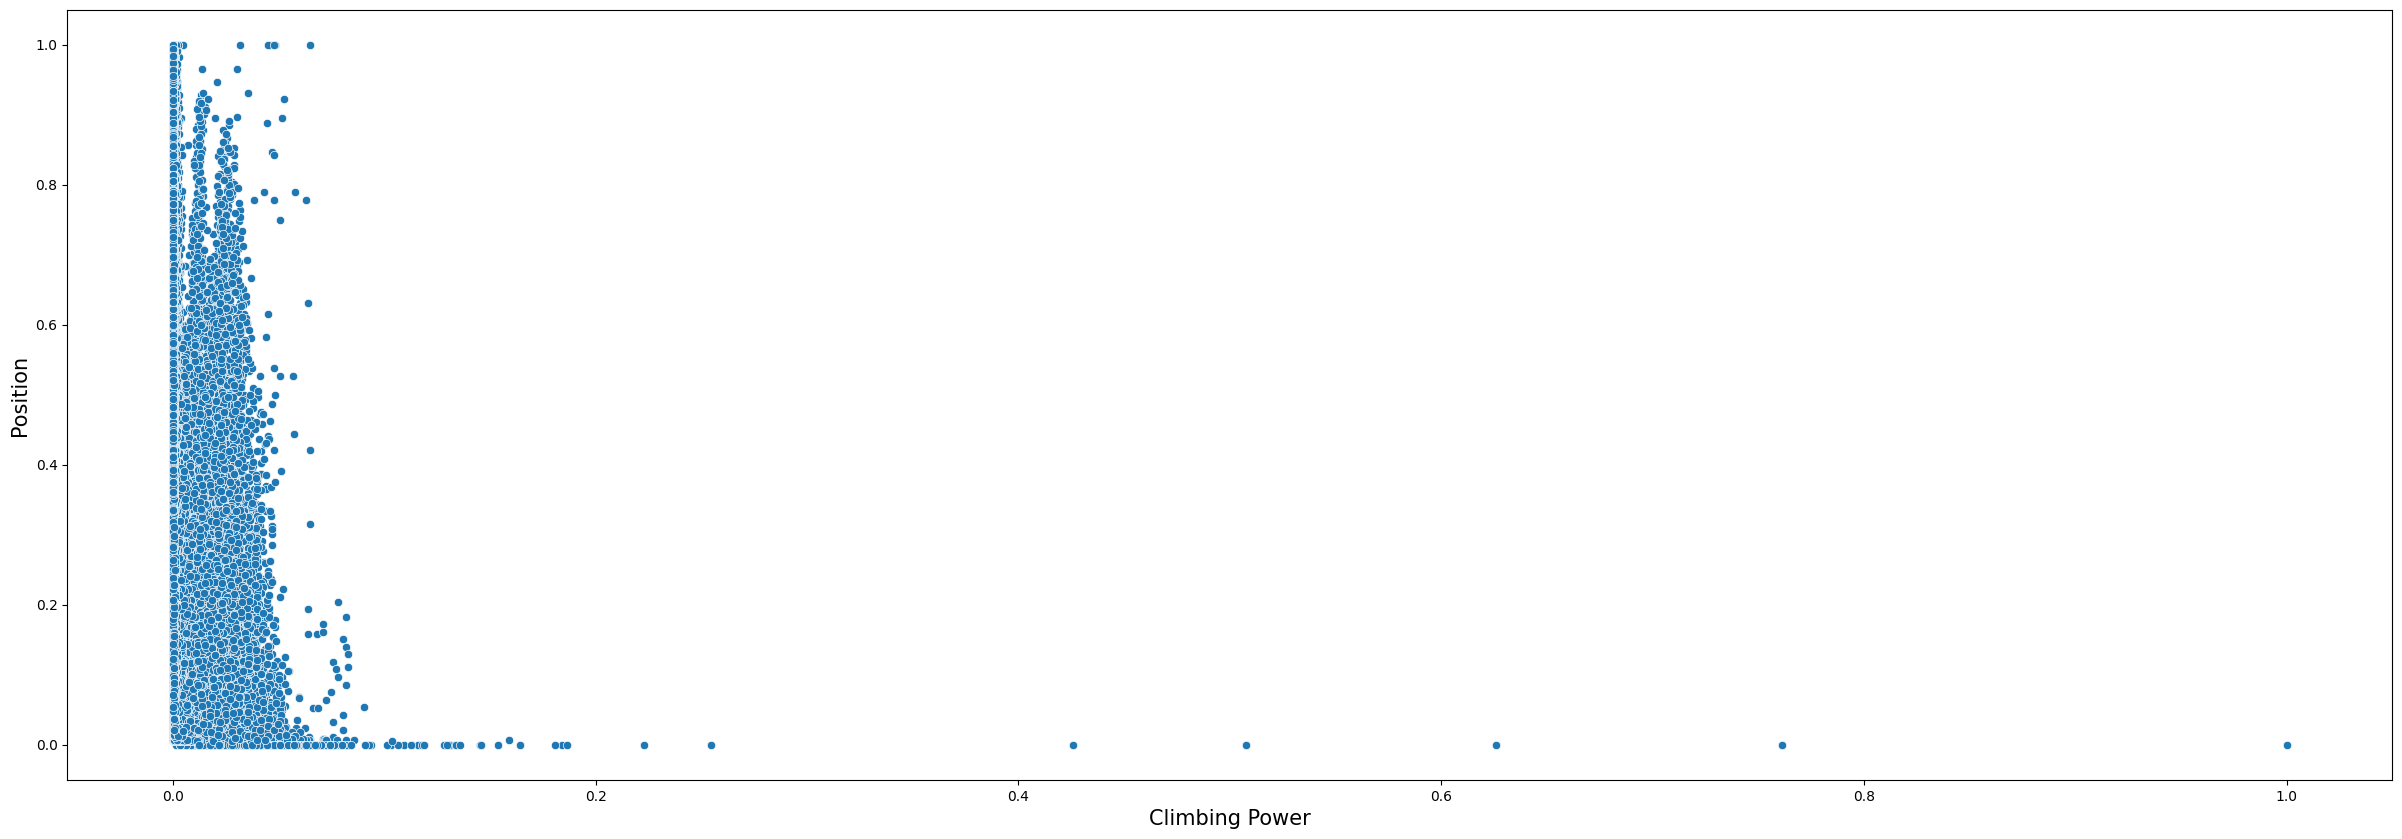

In [26]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_climb_power',
    y='position',
    data=dataset[dataset['profile'] > 2])
plt.xlabel('Climbing Power', fontsize=15)
plt.ylabel('Position', fontsize=15)
plt.show()

### Season Attribute

Text(5.069444444444445, 0.5, 'Count')

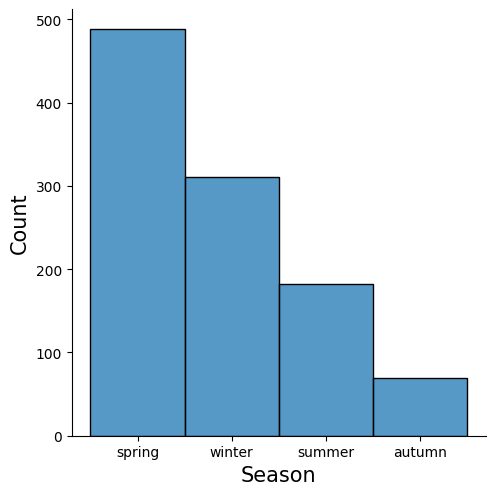

In [27]:
tmp_df = pd.DataFrame({
    'season': dataset['race_season'],
    'prestige': dataset['race_prestige'],
    'race_name': dataset['race_name'],
    'stage': dataset['race_stage'],
    'cyclist_climb_power': dataset['cyclist_climb_power'],
    'team': dataset['cyclist_team'],
    'length': dataset['length'],
    'climb_percentage': dataset['climb_percentage'], 
    'profile': dataset['profile'],
    'bmi': dataset['cyclist_bmi'],
    'year': dataset['date'].dt.year,
})

n_bins = 4

sb.displot(tmp_df.drop_duplicates(subset=['race_name', 'year']), 
                x="season", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Season')

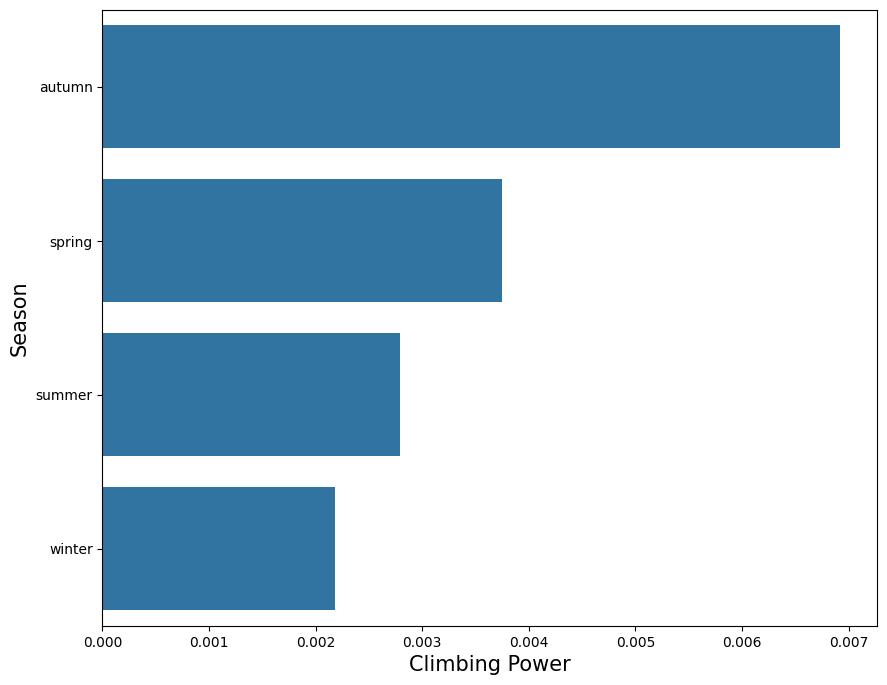

In [28]:
tmp_mean = tmp_df[tmp_df['profile'] > 2].drop_duplicates(subset=['race_name', 'year']).groupby('season')['cyclist_climb_power'].mean().reset_index()
# We avoid profile in {1,2} because they represent flat races
plt.figure(figsize=(10, 8))
sb.barplot(
    y='season',
    x='cyclist_climb_power',
    data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()],
    orient='h')
plt.xlabel('Climbing Power', fontsize=15)
plt.ylabel('Season', fontsize=15)

Text(0, 0.5, 'Season')

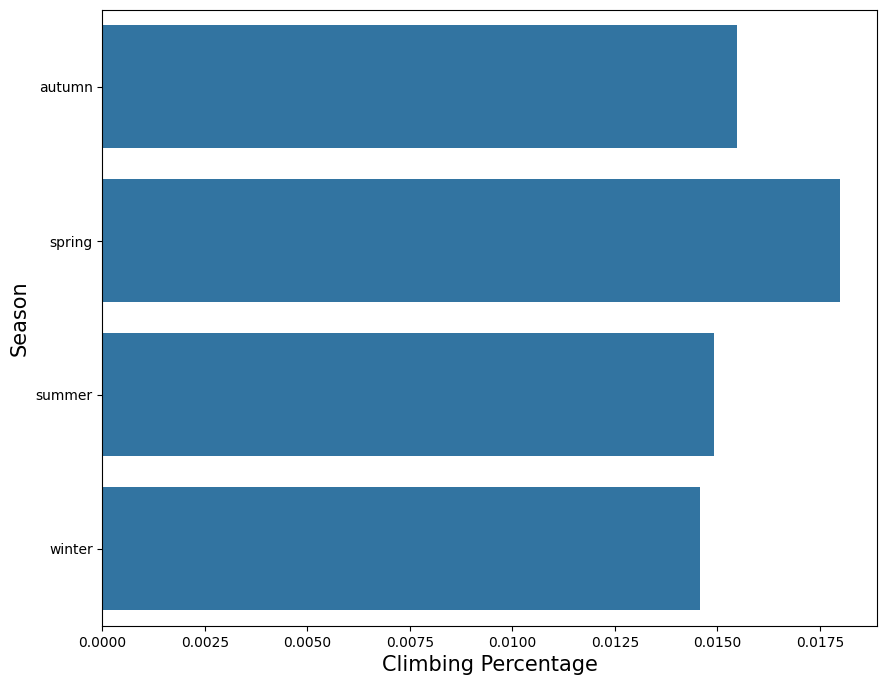

In [29]:
tmp_mean = tmp_df.drop_duplicates(subset=['race_name', 'year', 'stage']).groupby('season')['climb_percentage'].mean().reset_index()
# Filter races with little climb_total and profile
plt.figure(figsize=(10, 8))
sb.barplot(
    y='season',
    x='climb_percentage',
    data=tmp_mean[tmp_mean['climb_percentage'].notnull()],
    orient='h')
plt.xlabel('Climbing Percentage', fontsize=15)
plt.ylabel('Season', fontsize=15)

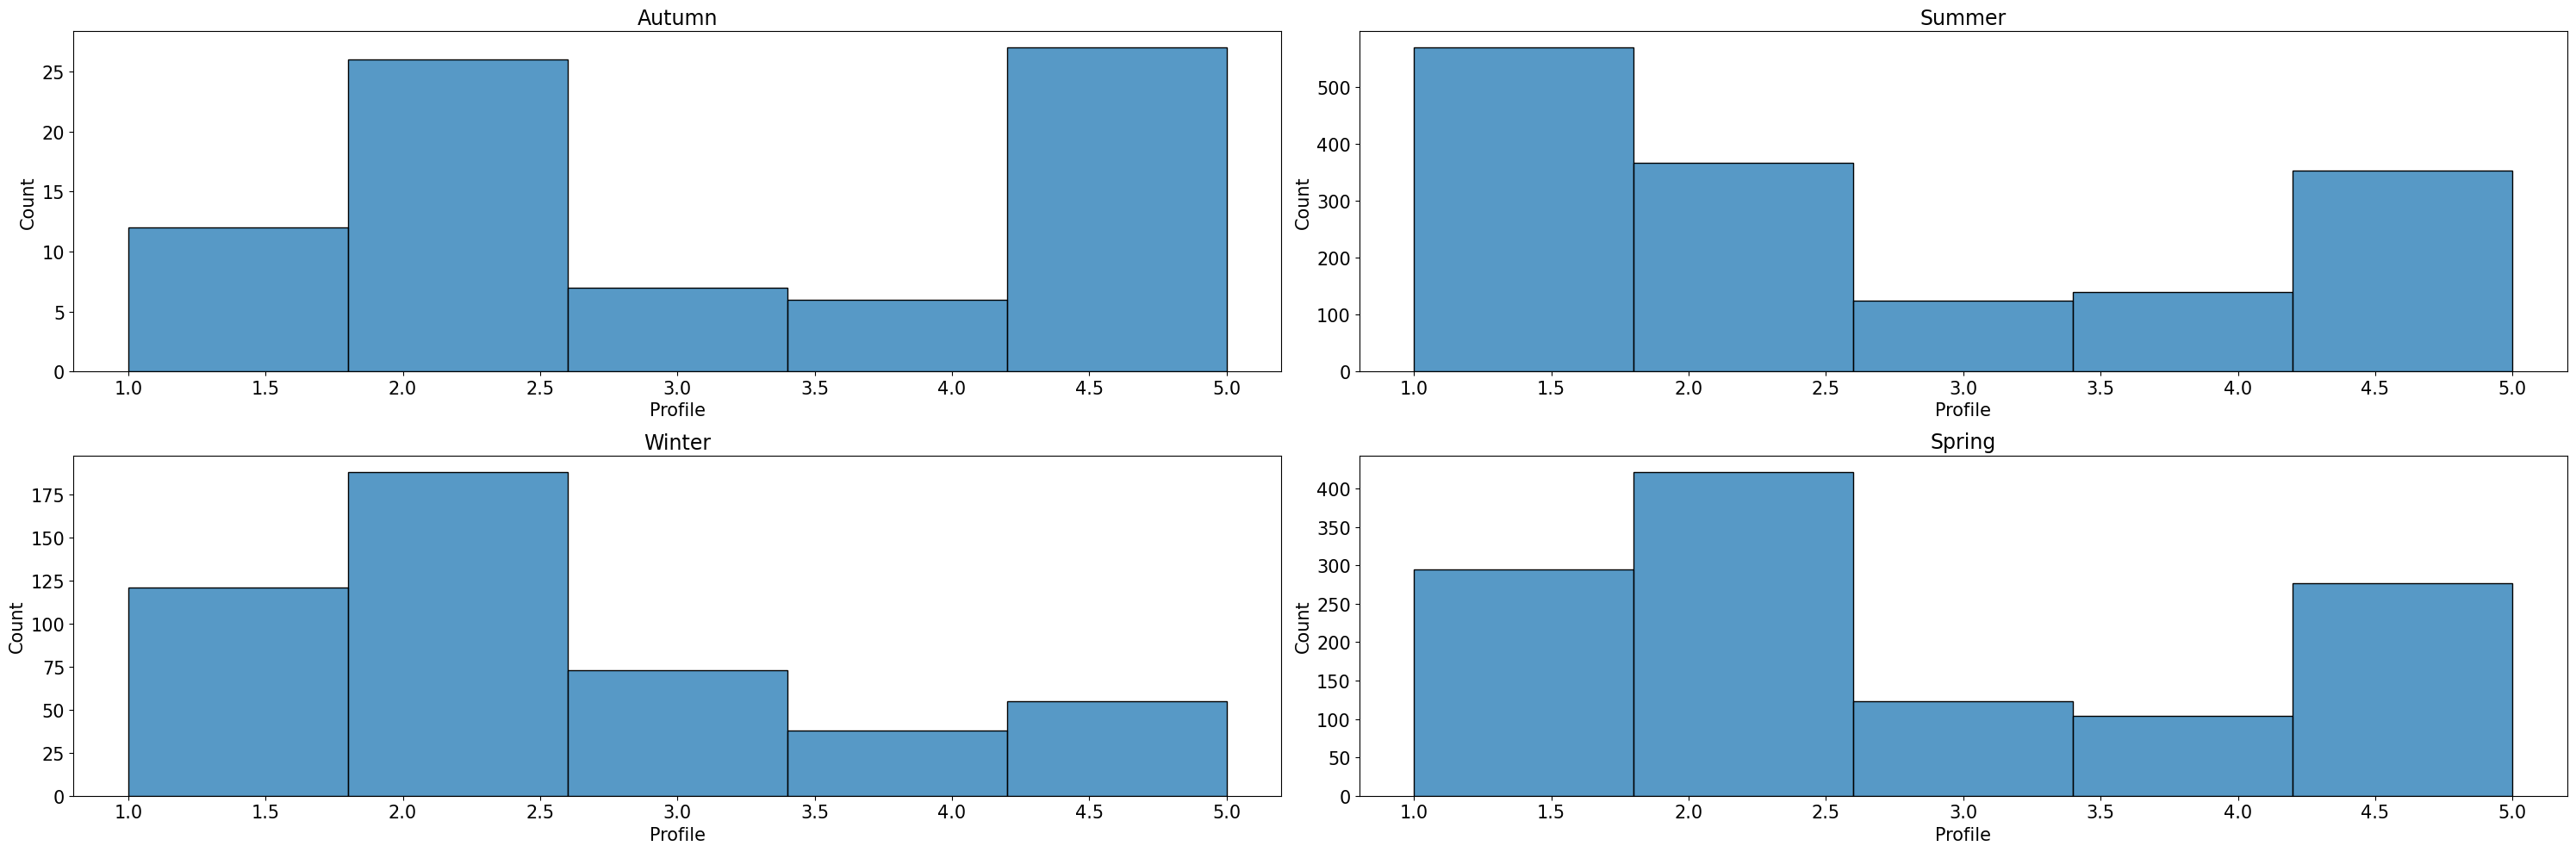

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0,0].set_title('Autumn', fontsize=17)
ax[0,0].set_xlabel('Profile', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'summer'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0,1].set_title('Summer', fontsize=17)
ax[0,1].set_xlabel('Profile', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'winter'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1,0].set_title('Winter', fontsize=17)
ax[1,0].set_xlabel('Profile', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'spring'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1,1].set_title('Spring', fontsize=17)
ax[1,1].set_xlabel('Profile', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout() # Avoid overlapping

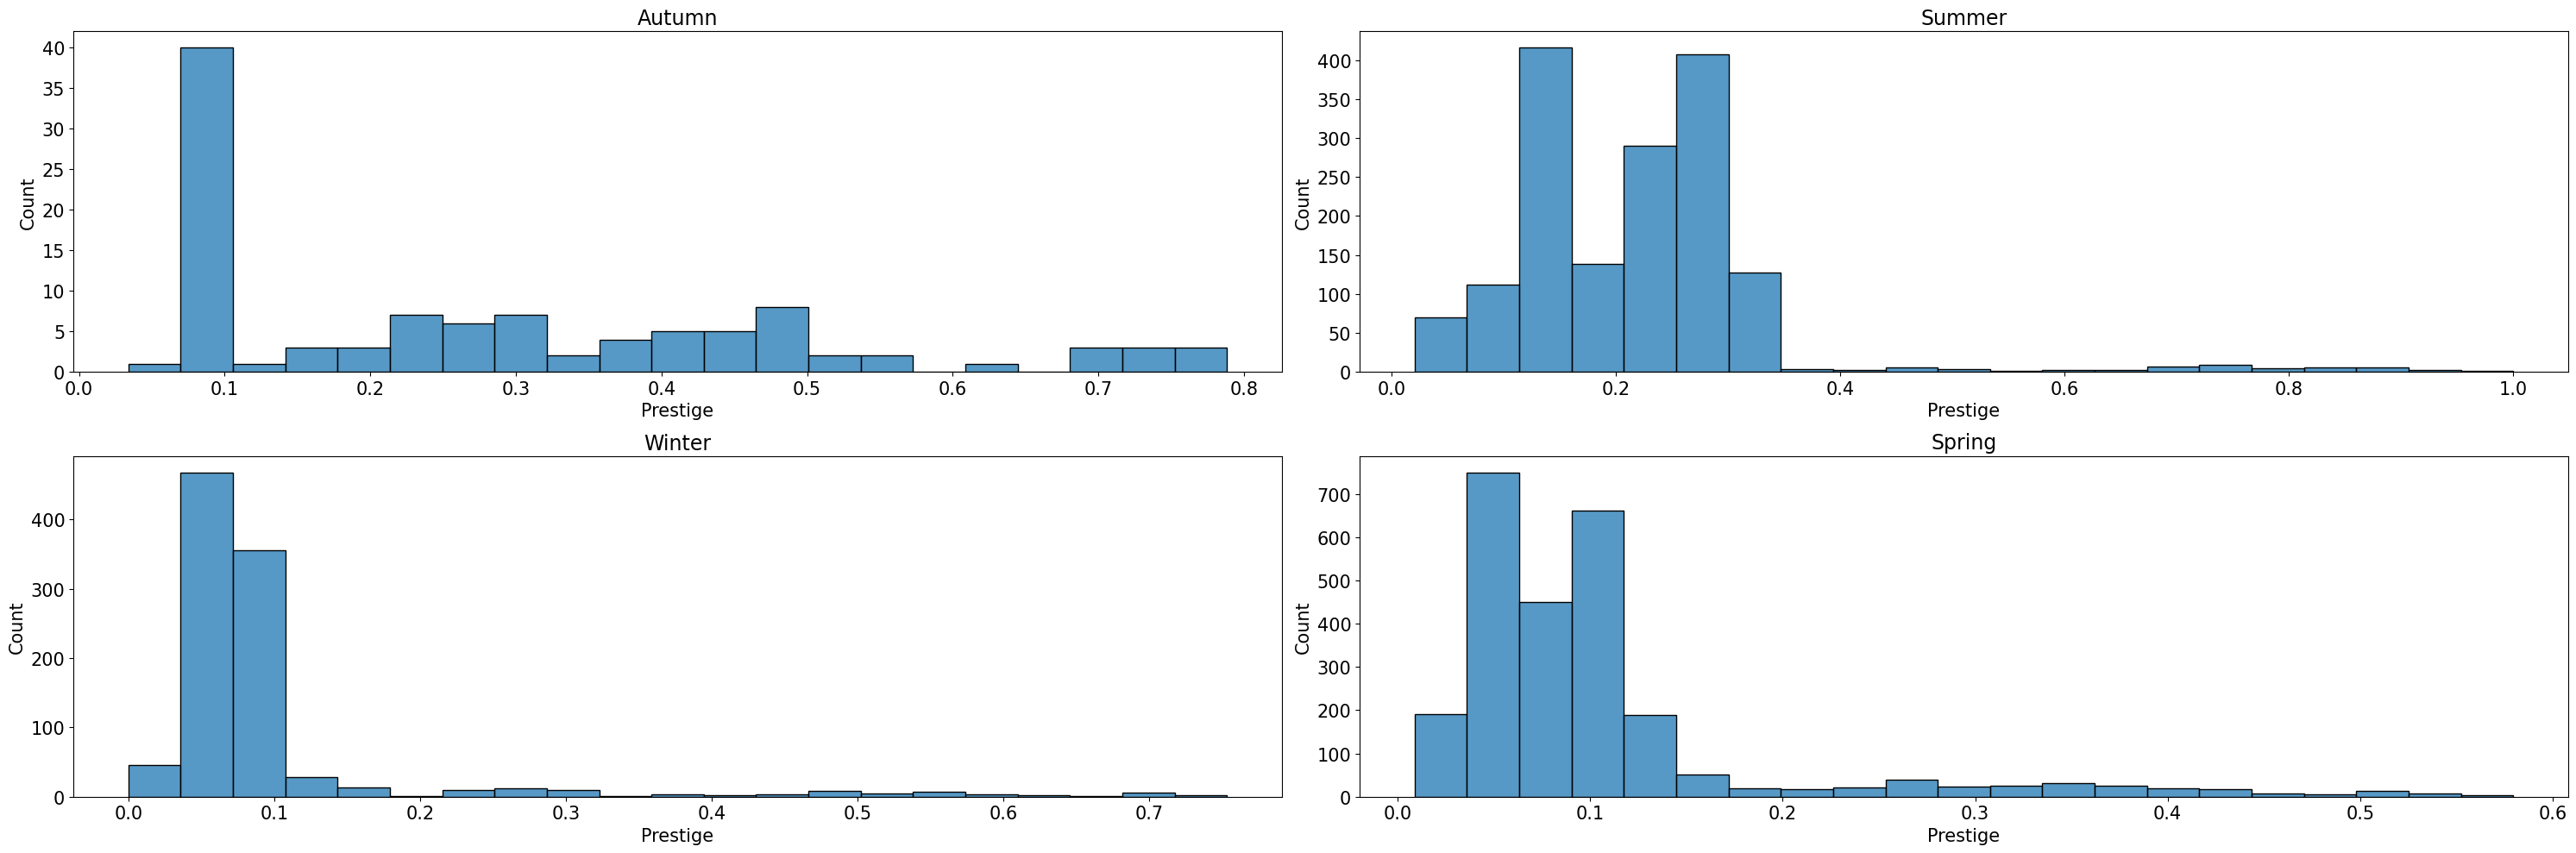

In [31]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0,0].set_title('Autumn', fontsize=17)
ax[0,0].set_xlabel('Prestige', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'summer'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0,1].set_title('Summer', fontsize=17)
ax[0,1].set_xlabel('Prestige', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'winter'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1,0].set_title('Winter', fontsize=17)
ax[1,0].set_xlabel('Prestige', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'spring'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="prestige", 
            bins=n_bins, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1,1].set_title('Spring', fontsize=17)
ax[1,1].set_xlabel('Prestige', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout() # Avoid overlapping

In [32]:
tmp_df.drop_duplicates(subset=['race_name', 'year', 'stage']).groupby('season')['prestige'].describe()

count      mean       std       min       25%       50%       75%  \
season                                                                       
autumn   106.0  0.281708  0.206159  0.033780  0.092961  0.237752  0.431860   
spring  2570.0  0.105642  0.091137  0.008811  0.053523  0.076955  0.112808   
summer  1620.0  0.218976  0.121680  0.020535  0.133807  0.230289  0.272064   
winter   985.0  0.096339  0.106456  0.000000  0.055428  0.069112  0.086879   

             max  
season            
autumn  0.788245  
spring  0.579532  
summer  1.000000  
winter  0.753393

In [33]:
tmp_df.drop_duplicates(subset=['race_name', 'year', 'stage']).groupby('season')['bmi'].describe()

count       mean       std        min        25%        50%  \
season                                                                 
autumn    91.0  20.611134  1.023944  19.379197  19.470778  21.037253   
spring  1696.0  21.094066  1.079516  18.827160  20.515086  21.135785   
summer  1237.0  20.970311  1.039611  18.827160  20.286508  21.037253   
winter   767.0  21.136102  1.245902  18.812147  20.015496  21.200991   

              75%        max  
season                        
autumn  21.248644  23.808797  
spring  21.705129  24.784258  
summer  21.366869  24.304618  
winter  22.204082  25.473465

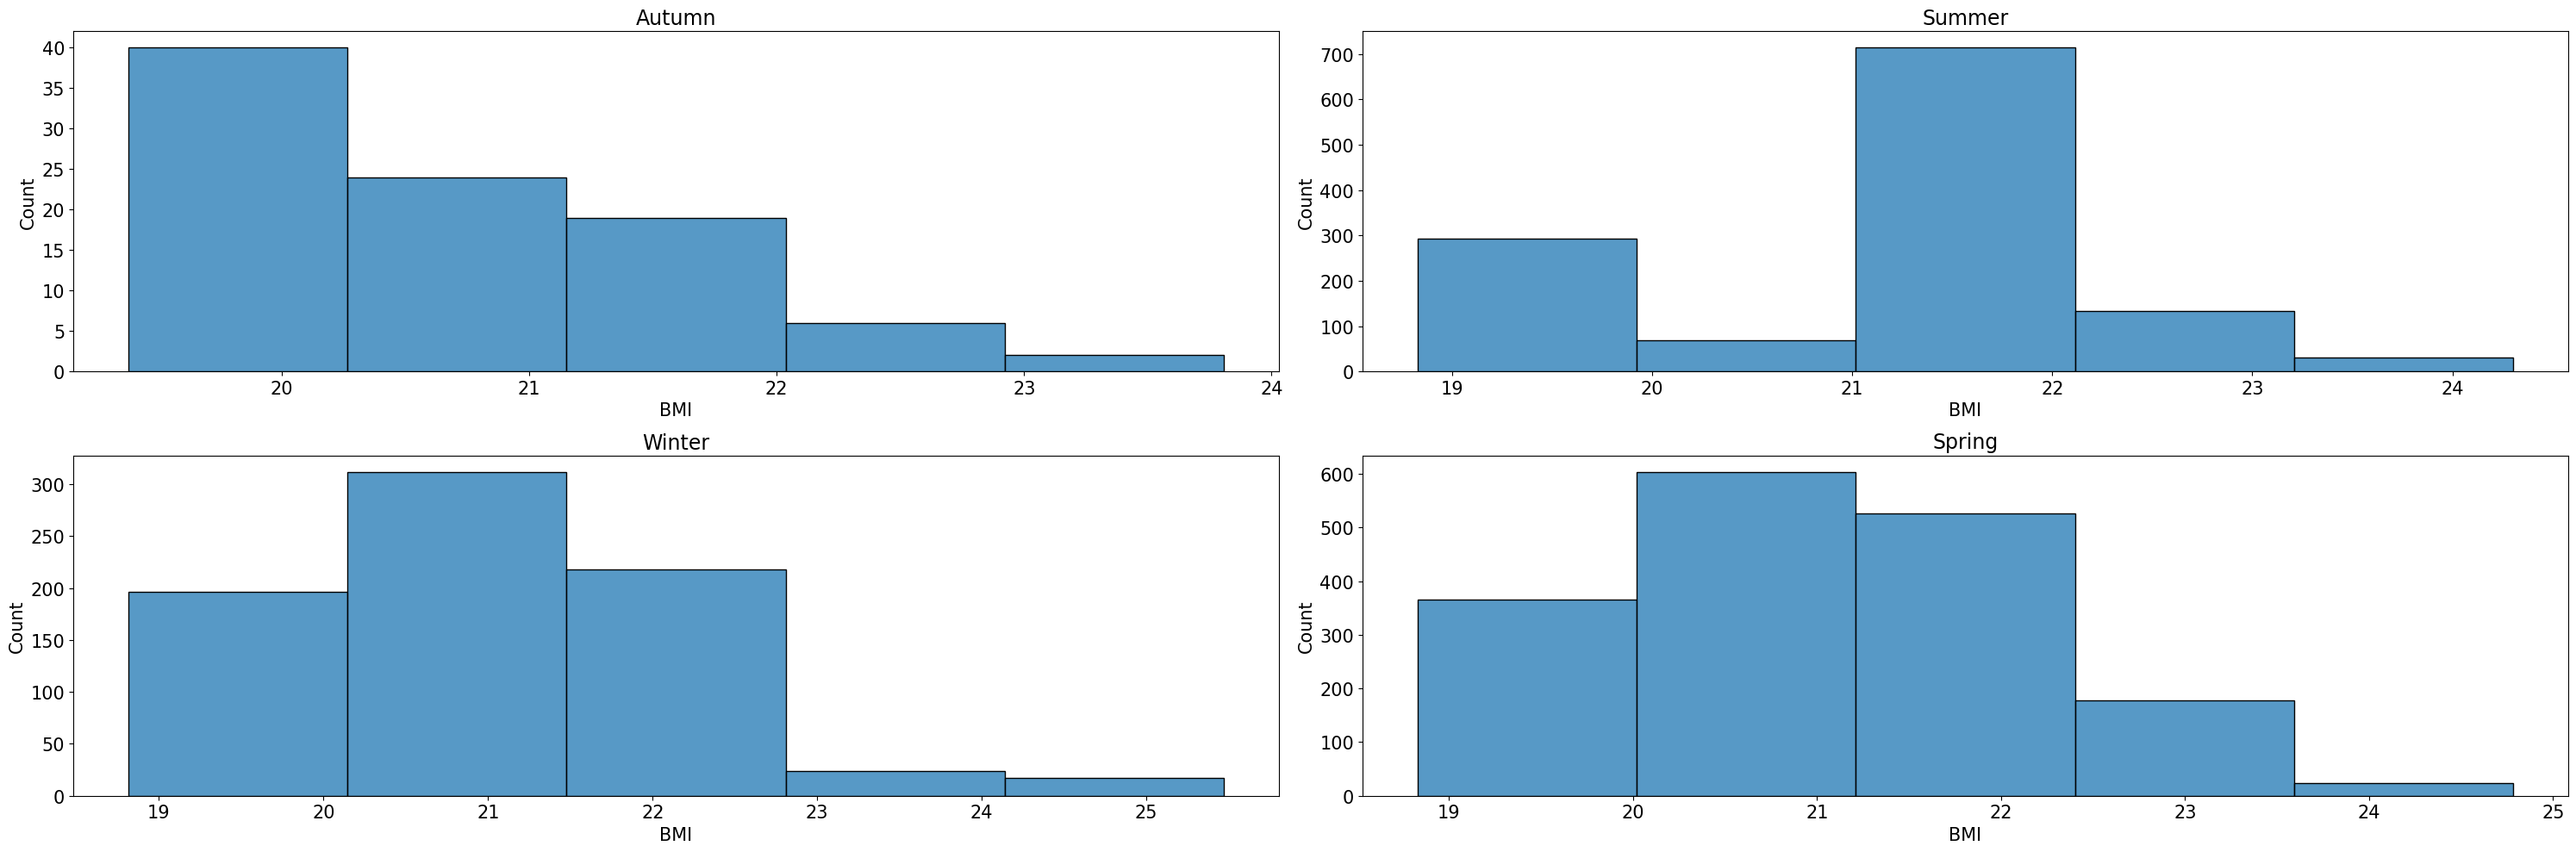

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0,0].set_title('Autumn', fontsize=17)
ax[0,0].set_xlabel('BMI', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'summer'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0,1].set_title('Summer', fontsize=17)
ax[0,1].set_xlabel('BMI', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'winter'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1,0].set_title('Winter', fontsize=17)
ax[1,0].set_xlabel('BMI', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'spring'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1,1].set_title('Spring', fontsize=17)
ax[1,1].set_xlabel('BMI', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout() # Avoid overlapping

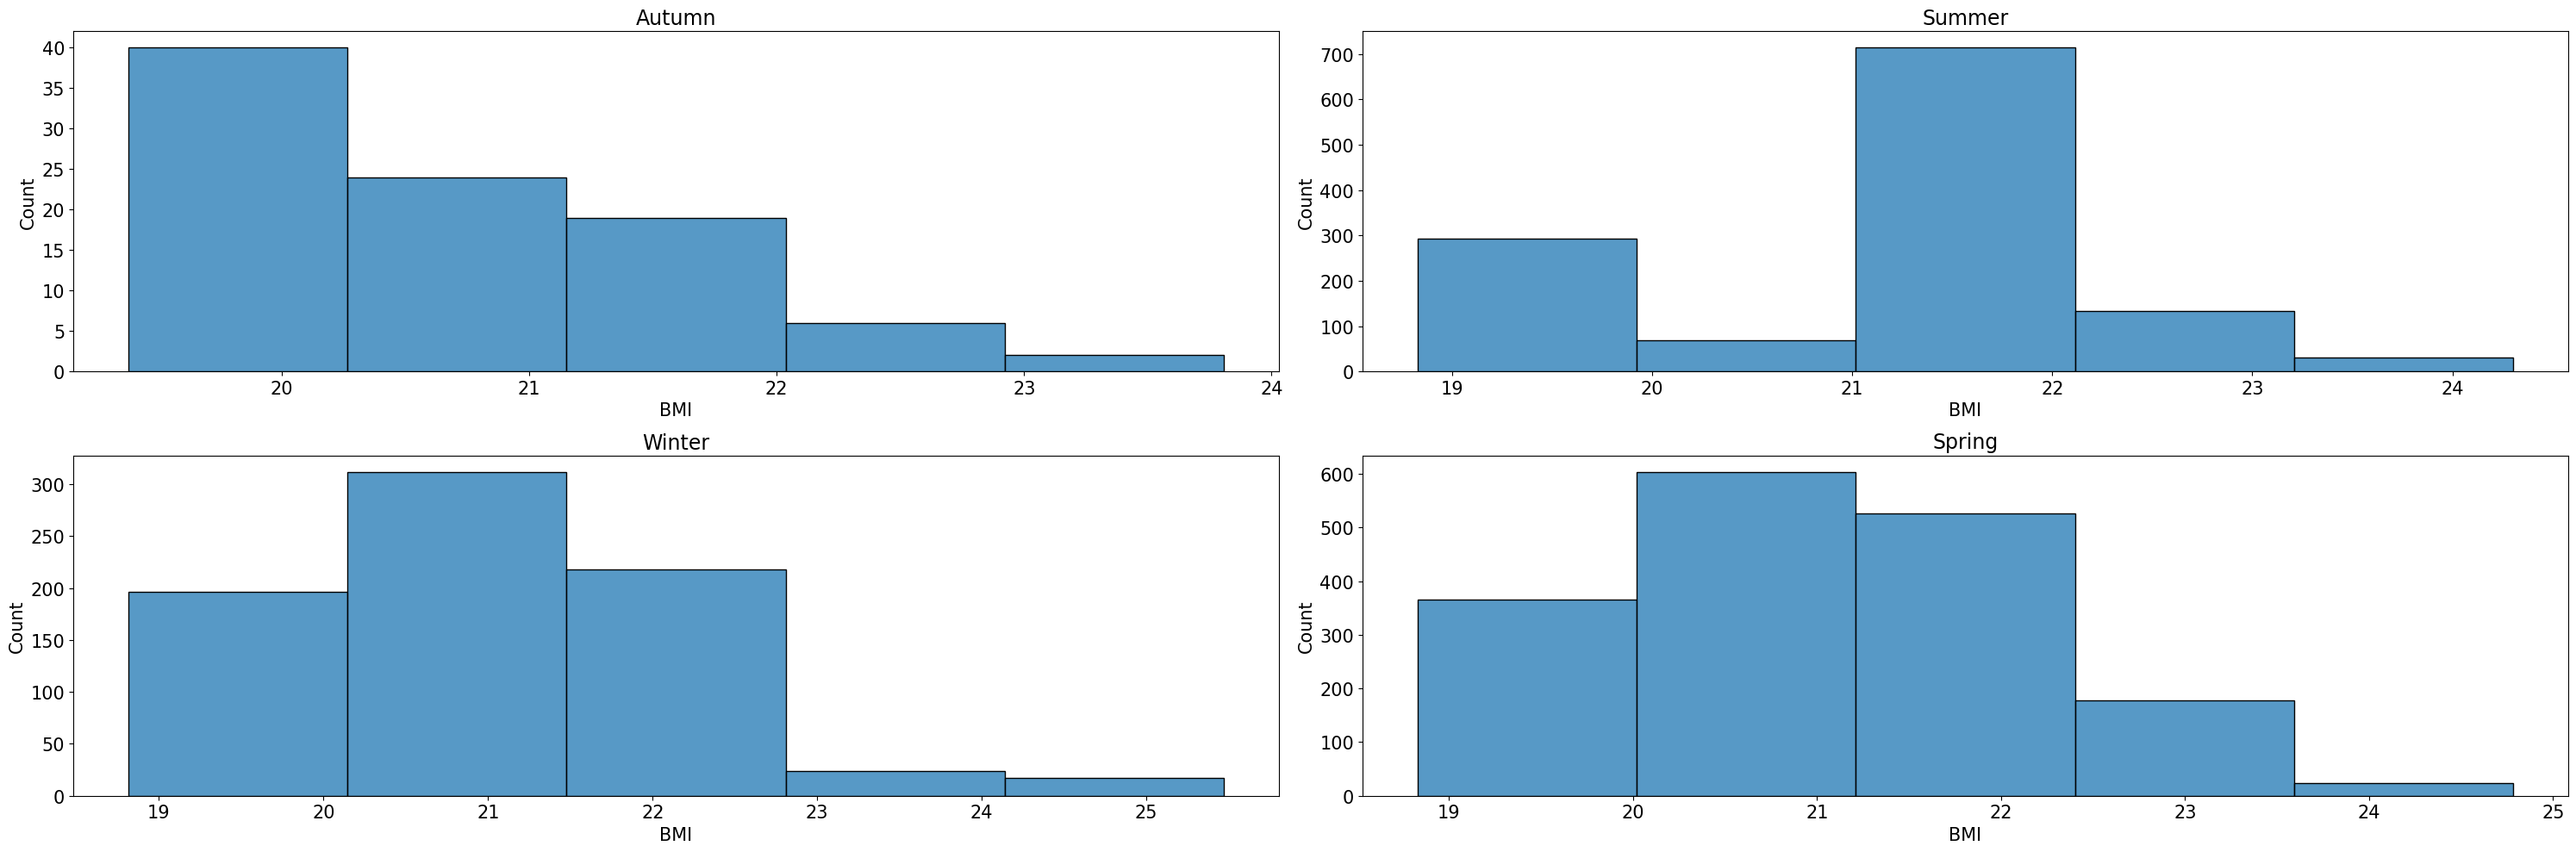

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0,0].set_title('Autumn', fontsize=17)
ax[0,0].set_xlabel('BMI', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'summer'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0,1].set_title('Summer', fontsize=17)
ax[0,1].set_xlabel('BMI', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'winter'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1,0].set_title('Winter', fontsize=17)
ax[1,0].set_xlabel('BMI', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(tmp_df[tmp_df['season'] == 'spring'].drop_duplicates(subset=['race_name', 'stage', 'year']), 
            x="bmi", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1,1].set_title('Spring', fontsize=17)
ax[1,1].set_xlabel('BMI', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout() # Avoid overlapping

In [36]:
team_season = pd.crosstab(tmp_df['team'], tmp_df['season'], normalize='index').reset_index()

team_season['autumn'] = (team_season['autumn'] / team_season['autumn'].max())
team_season['spring'] = (team_season['spring'] / team_season['spring'].max())
team_season['summer'] = (team_season['summer'] / team_season['summer'].max())
team_season['winter'] = (team_season['winter'] / team_season['winter'].max())

print("Most present Team for Season\n")
print(team_season[team_season['autumn'] == team_season['autumn'].max()],"\n",
team_season[team_season['spring'] == team_season['spring'].max()],"\n",
team_season[team_season['summer'] == team_season['summer'].max()],"\n",
team_season[team_season['winter'] == team_season['winter'].max()])

print("\n\nLess present Team for Season\n")
print(team_season[team_season['autumn'] == team_season['autumn'].min()],"\n",
team_season[team_season['spring'] == team_season['spring'].min()],"\n",
team_season[team_season['summer'] == team_season['summer'].min()],"\n",
team_season[team_season['winter'] == team_season['winter'].min()])


Most present Team for Season

season               team  autumn    spring    summer    winter
71      south-africa-2022     1.0  0.558148  0.700441  0.156627 
 season          team  autumn  spring    summer   winter
26      denmark-2003     0.0     1.0  0.009704  0.25463 
 season                  team    autumn    spring  summer    winter
62      o.n.c.e.-eroski-2003  0.066343  0.495587     1.0  0.149448 
 season                       team  autumn  spring  summer  winter
63      quickstep-innergetic-2009     0.0     0.0     0.0     1.0


Less present Team for Season

season                       team  autumn  spring    summer   winter
26                   denmark-2003     0.0     1.0  0.009704  0.25463
63      quickstep-innergetic-2009     0.0     0.0  0.000000  1.00000 
 season                       team  autumn  spring  summer  winter
63      quickstep-innergetic-2009     0.0     0.0     0.0     1.0 
 season                       team  autumn  spring  summer  winter
63      quickstep

In [37]:
tmp_df = pd.DataFrame({
    'race_name': dataset['race_name'],
    'stage': dataset['race_stage'],
    'team': dataset['cyclist_team'],
    'bmi': dataset['cyclist_bmi'],
    'year': dataset['date'].dt.year,
})

### Physical Effort Attribute

In [38]:
mean_efforts = dataset.groupby(by=['race_name', 'race_year'])['race_physical_effort'].mean().reset_index()

In [39]:
race_prestige = dataset.groupby(by=['race_name', 'race_year'])['race_prestige'].mean().reset_index()

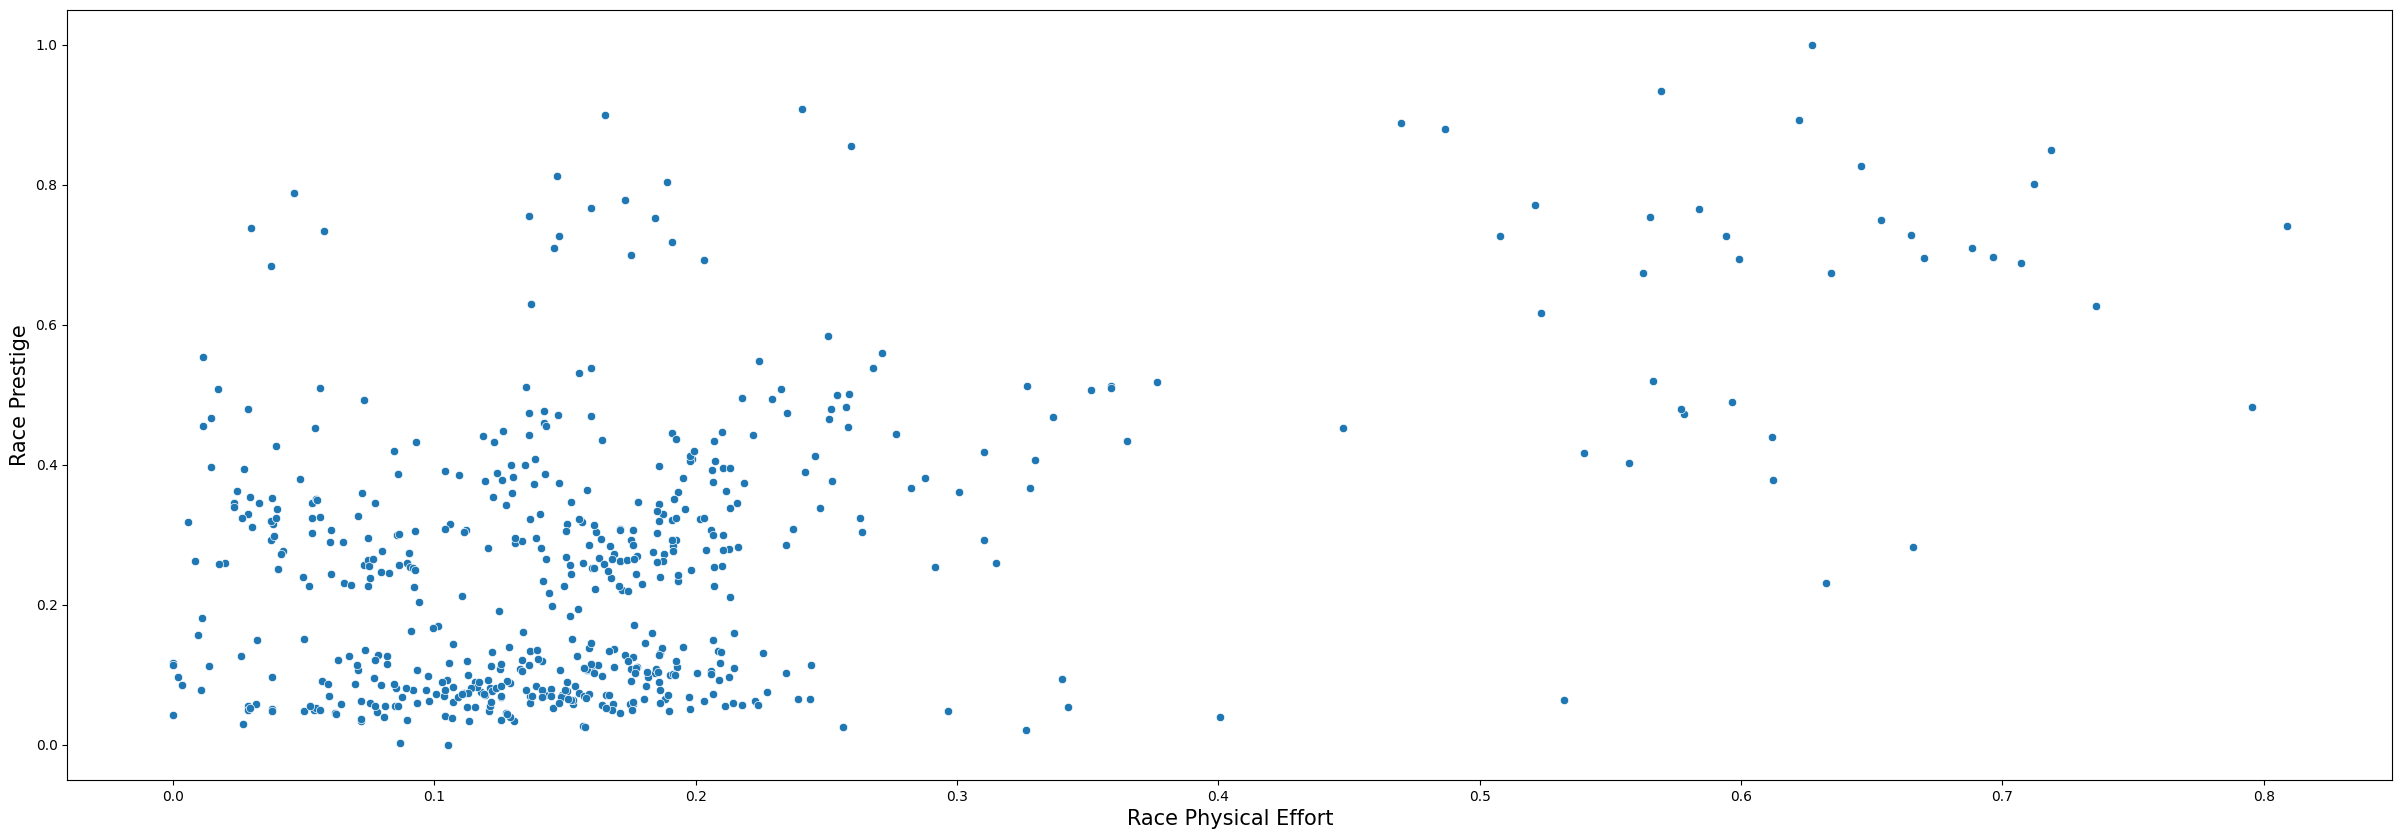

In [40]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x=mean_efforts['race_physical_effort'],
    y=race_prestige['race_prestige'])
plt.xlabel('Race Physical Effort', fontsize=15)
plt.ylabel('Race Prestige', fontsize=15)
plt.show()

Prestige tends to improve with increasing physical effort of the race.

In [41]:
race_points = dataset.groupby(by=['race_name', 'race_year'])['points'].mean().reset_index()

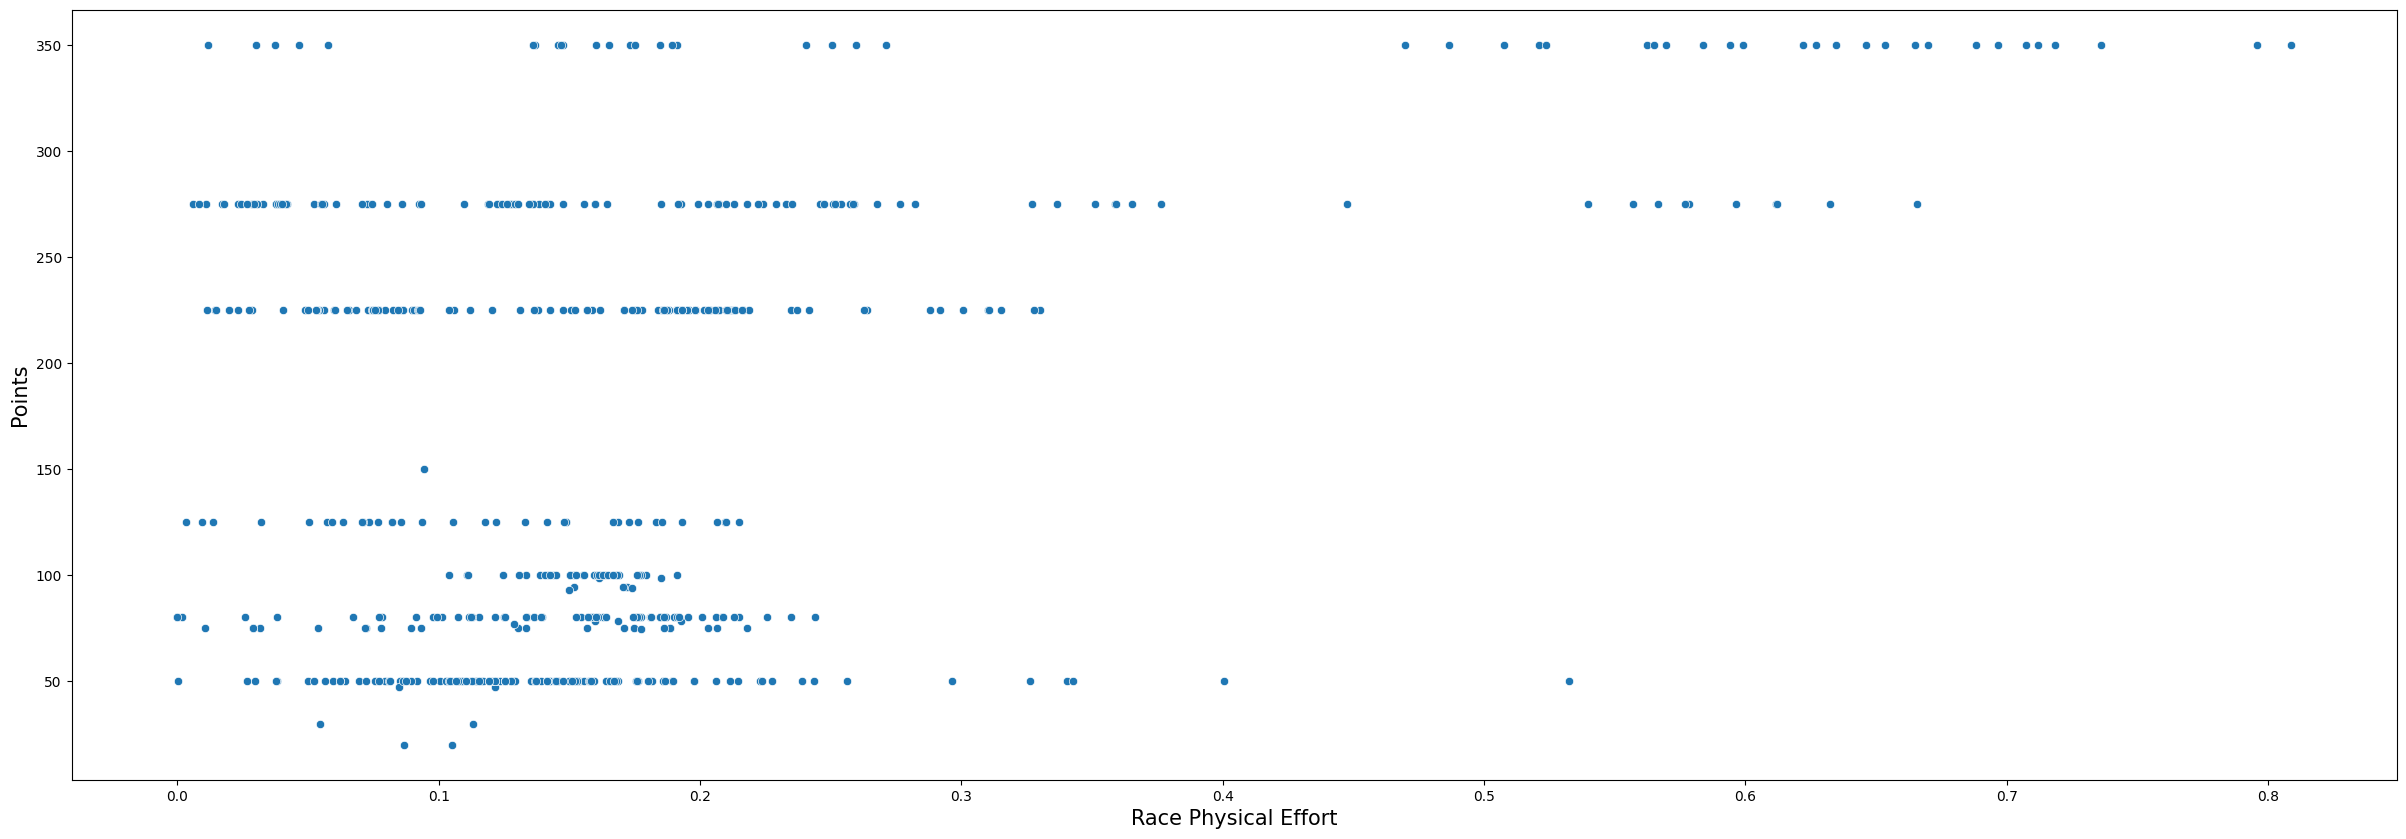

In [42]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x=mean_efforts['race_physical_effort'],
    y=race_points['points'])
plt.xlabel('Race Physical Effort', fontsize=15)
plt.ylabel('Points', fontsize=15)
plt.show()

The points tend to increase with the physical effort, but the cluster of points between 50 and 150 corresponding to the physical effort of 0.1 and 0.2 tends to concentrate most of the races there compared to their prestige.

In [43]:
race_startlists = dataset.groupby(by=['race_name', 'race_year'])['startlist_quality'].unique().reset_index()
race_startlists['startlist_quality'] = race_startlists['startlist_quality'].apply(lambda x: x[0])

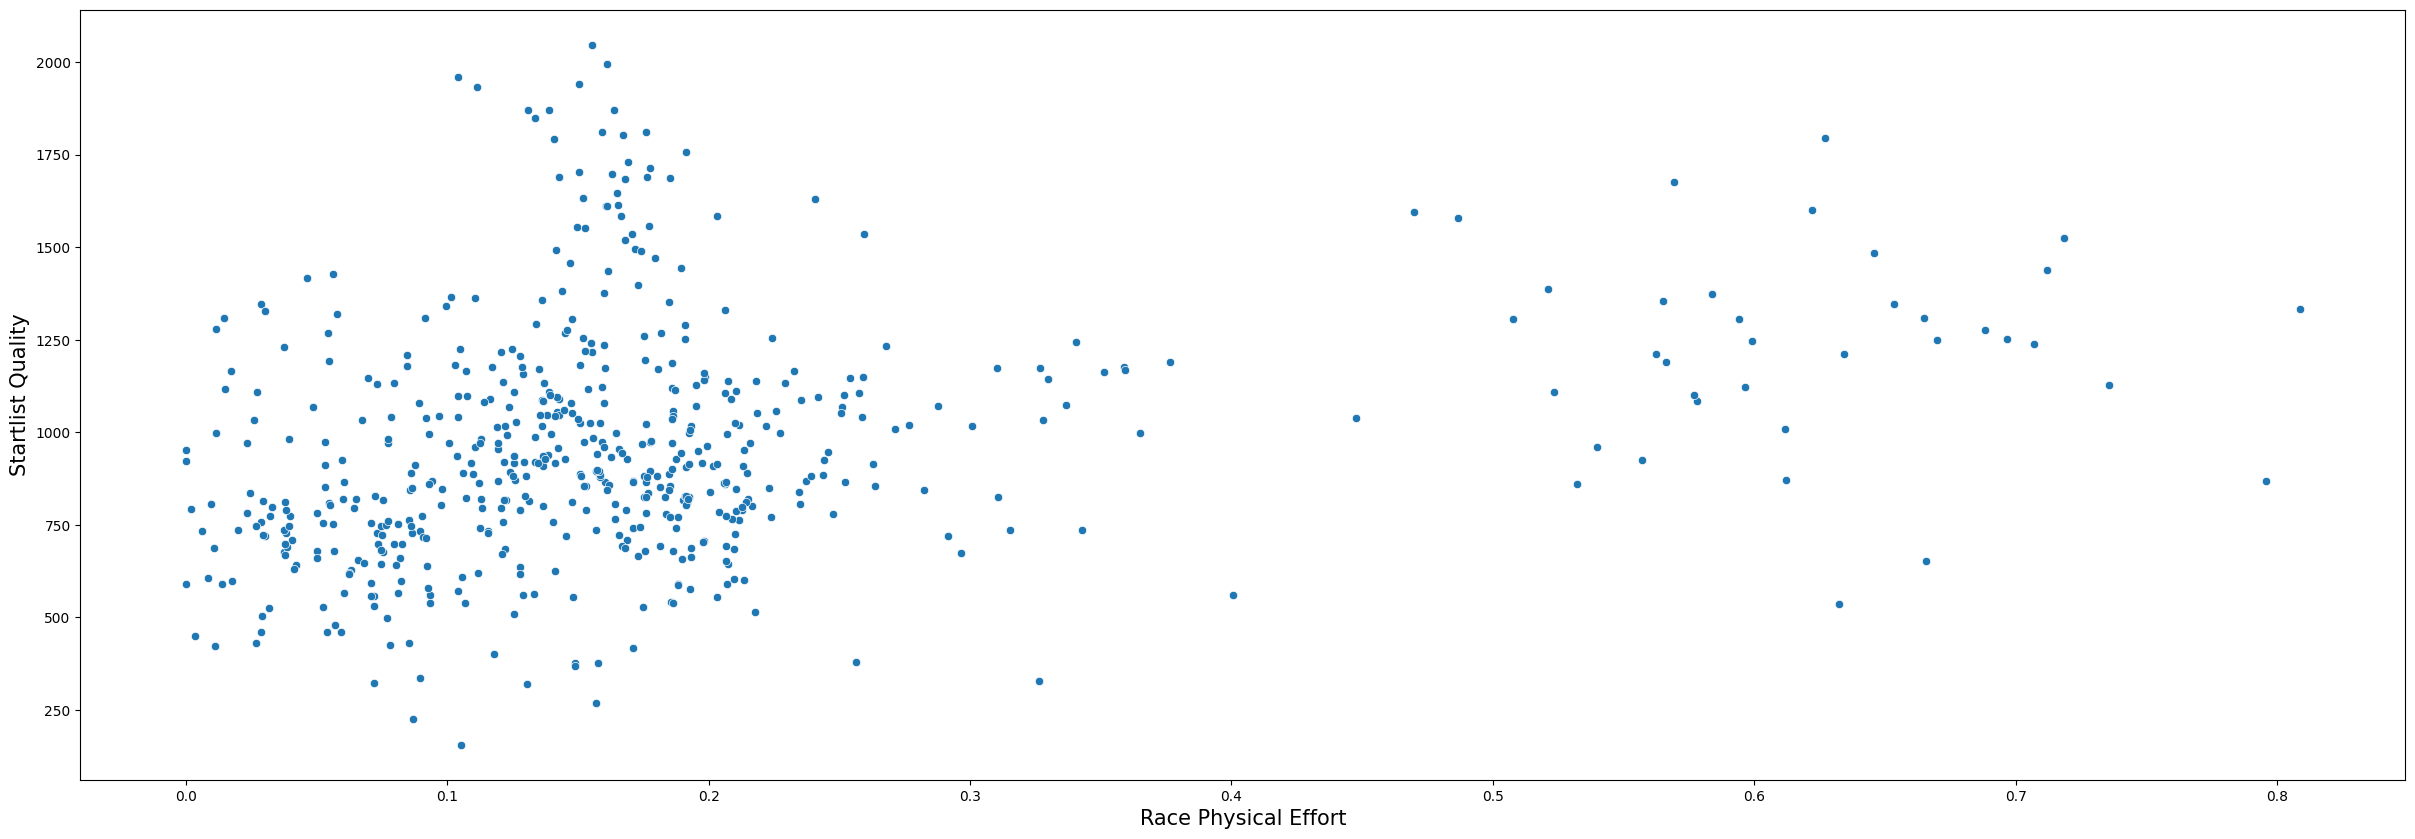

In [44]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x=mean_efforts['race_physical_effort'],
    y=race_startlists['startlist_quality'])
plt.xlabel('Race Physical Effort', fontsize=15)
plt.ylabel('Startlist Quality', fontsize=15)
plt.show()

There doesn't seem to be a strong correlation between physical effort and startlist quality, as the most prestigious races have an effort between 0.1 and 0.3.

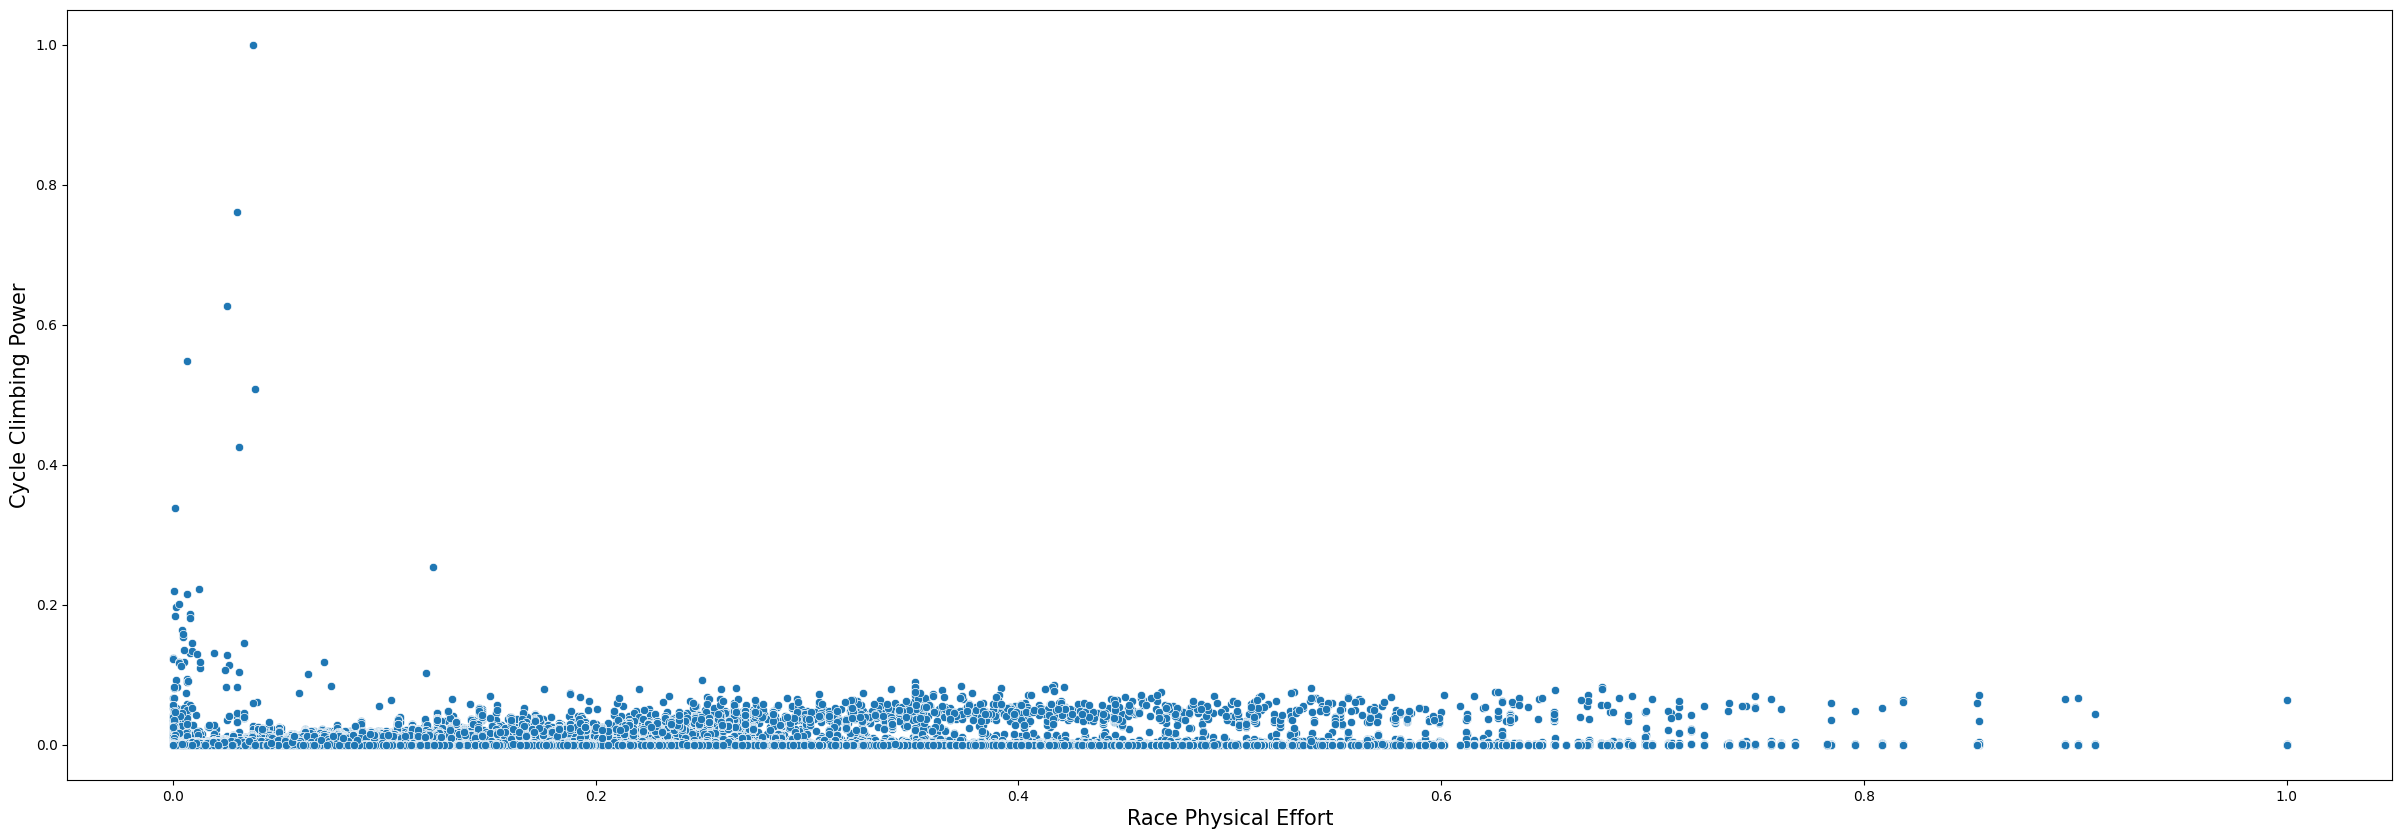

In [45]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='race_physical_effort',
    y='cyclist_climb_power',
    data=dataset)
plt.xlabel('Race Physical Effort', fontsize=15)
plt.ylabel('Cycle Climbing Power', fontsize=15)
plt.show()

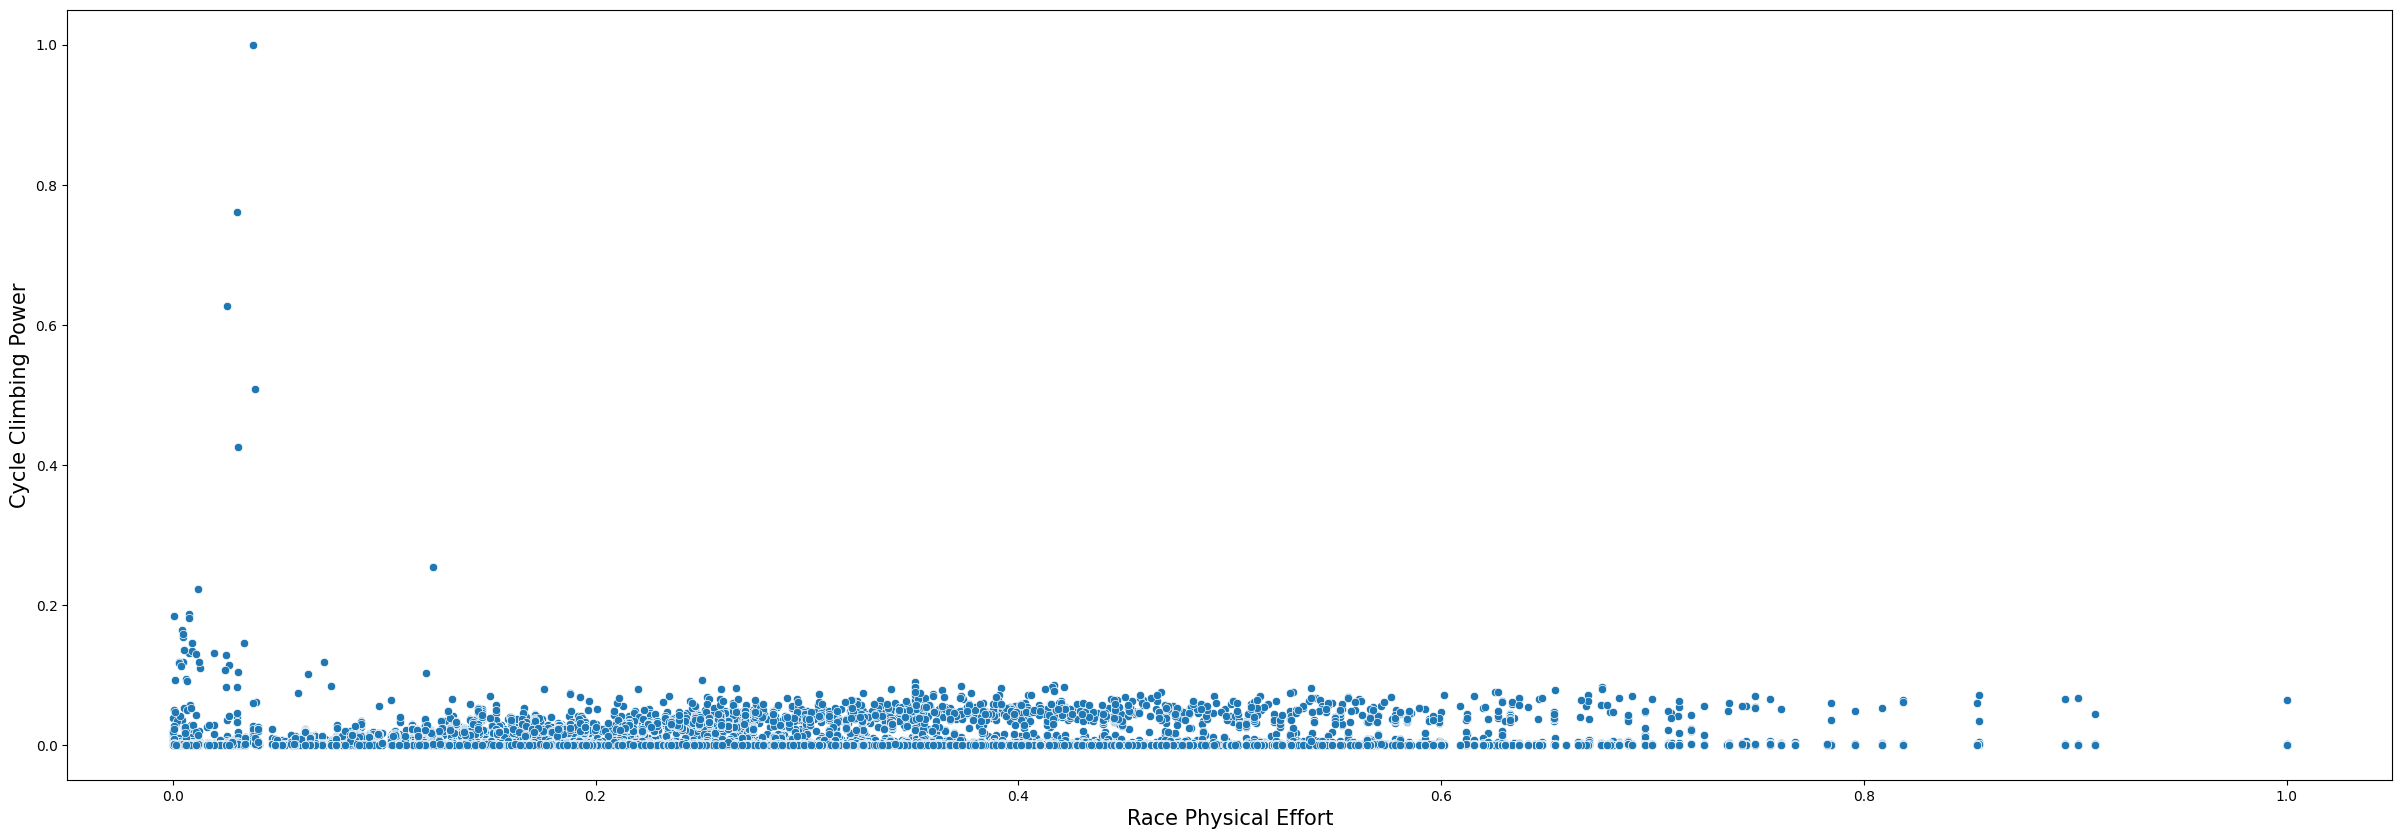

In [46]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='race_physical_effort',
    y='cyclist_climb_power',
    data=dataset[dataset['profile'] > 2])
plt.xlabel('Race Physical Effort', fontsize=15)
plt.ylabel('Cycle Climbing Power', fontsize=15)
plt.show()

### Prestige Attribute


Text(5.069444444444445, 0.5, 'Count')

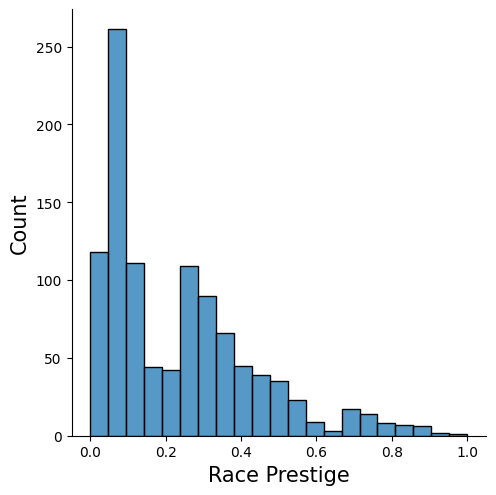

In [47]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)
tmp_df = dataset.drop_duplicates(subset=['race_name', 'race_year'])

sb.displot(tmp_df, 
                x="race_prestige", 
                kind="hist",
                row_order="desc",
                bins=n_bins)
plt.xlabel('Race Prestige', fontsize=15)
plt.ylabel('Count', fontsize=15)

Most of the races in our dataset have a prestige below 0.4

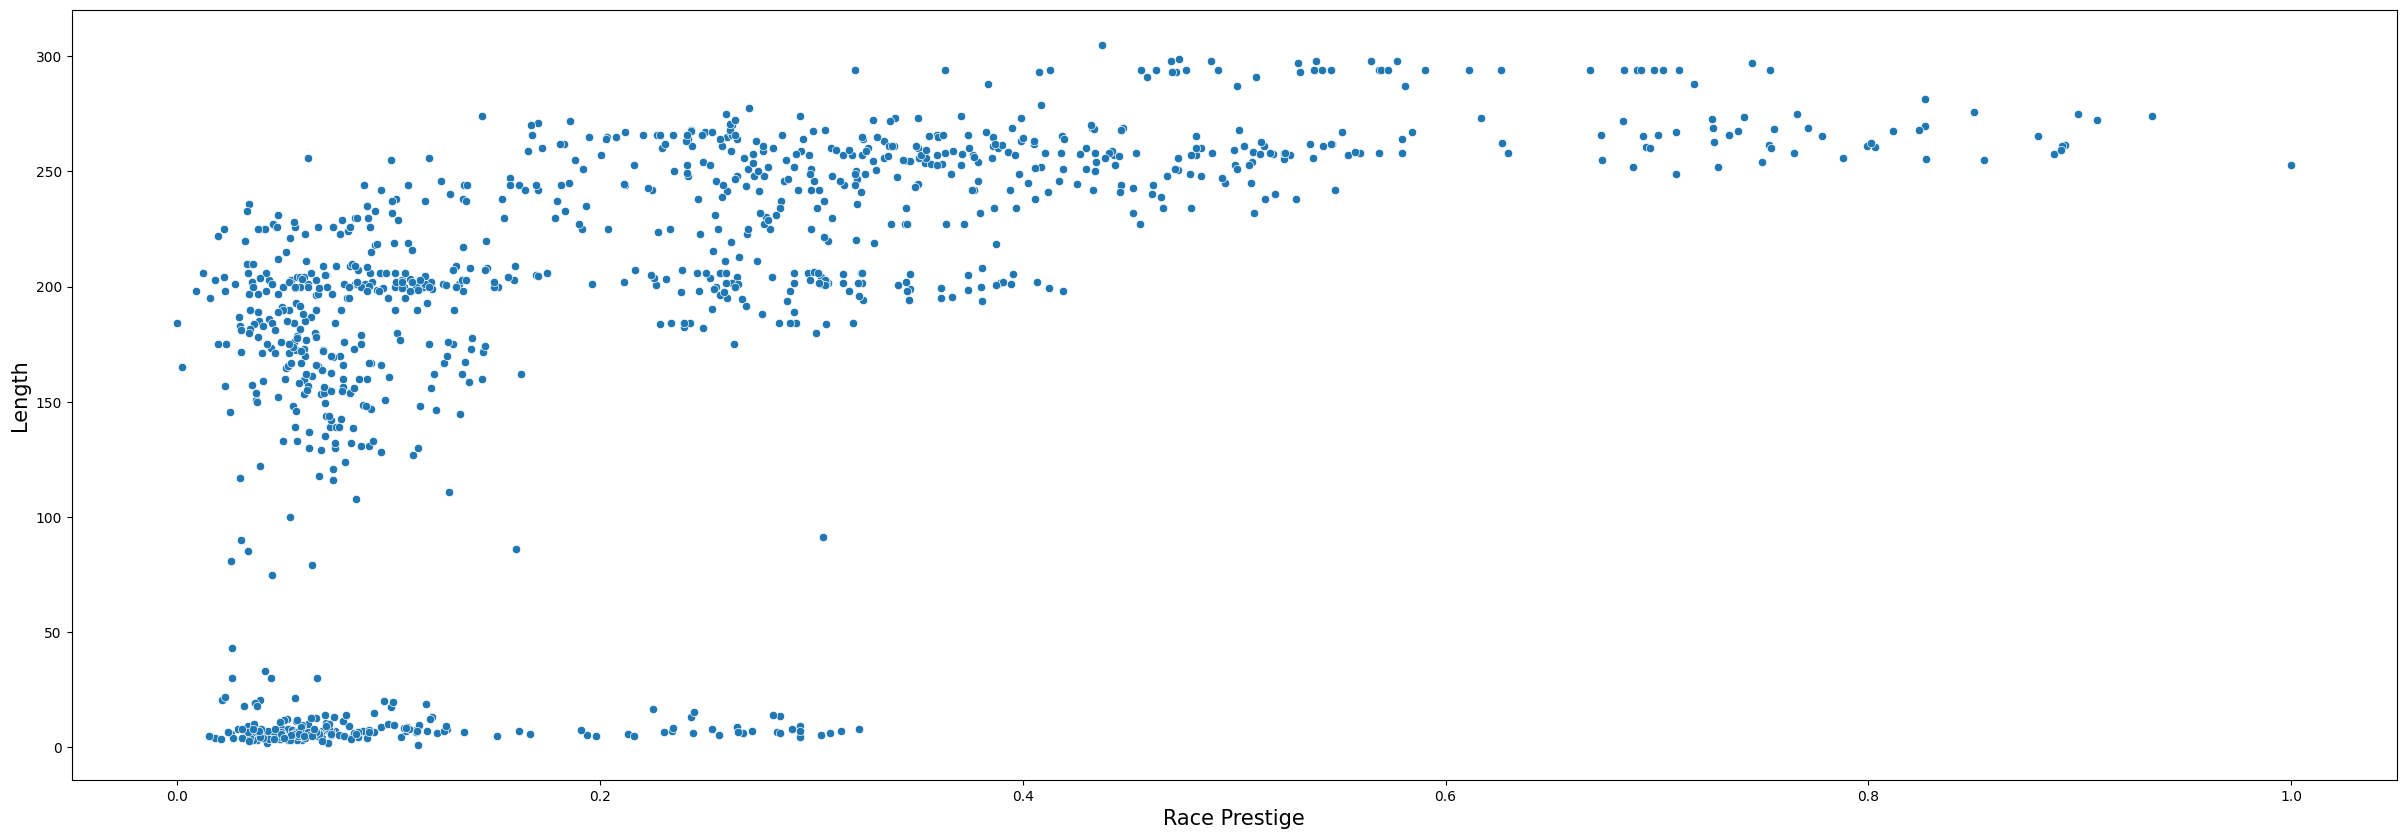

In [48]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='race_prestige',
    y='length',
    data=tmp_df)
plt.xlabel('Race Prestige', fontsize=15)
plt.ylabel('Length', fontsize=15)
plt.show()

Probably the average prestige increases with length, although high prestige races seem to be able to be very short as well

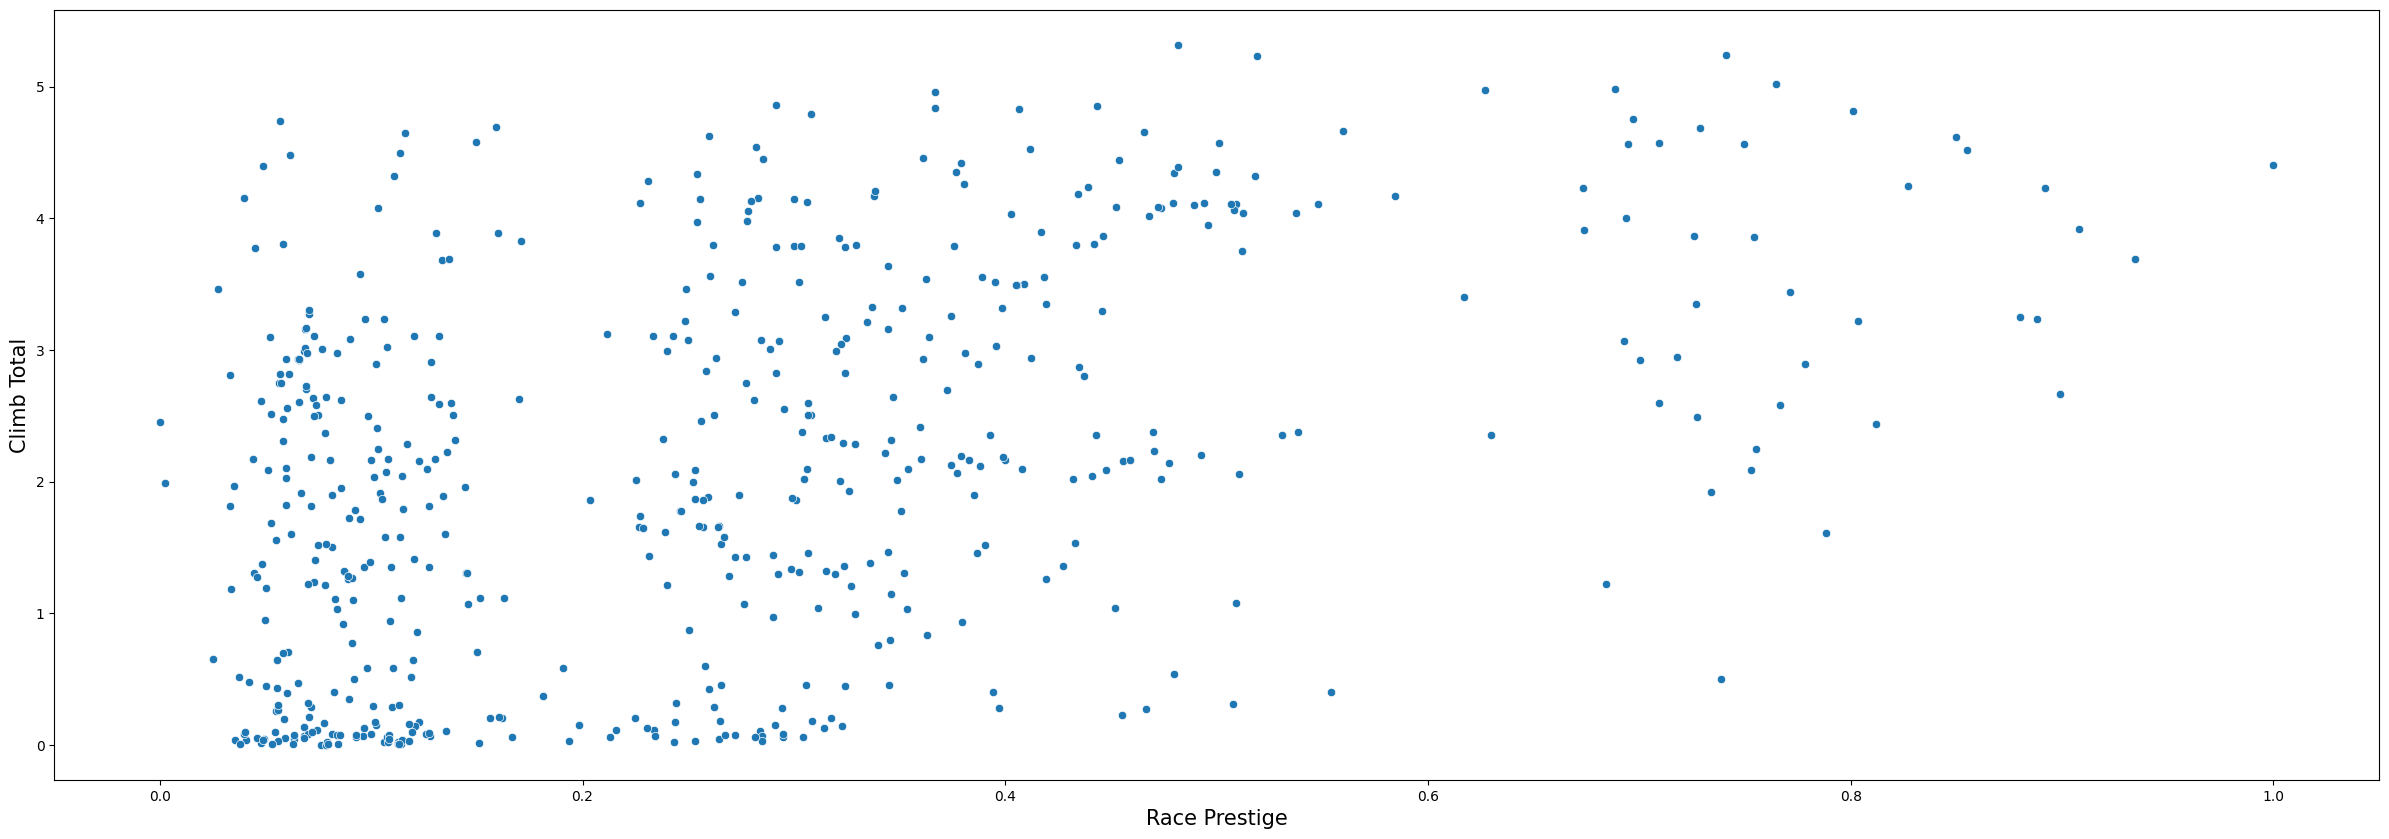

In [49]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='race_prestige',
    y='climb_total',
    data=tmp_df)
plt.xlabel('Race Prestige', fontsize=15)
plt.ylabel('Climb Total', fontsize=15)
plt.show()

We have a similar trend with climb total

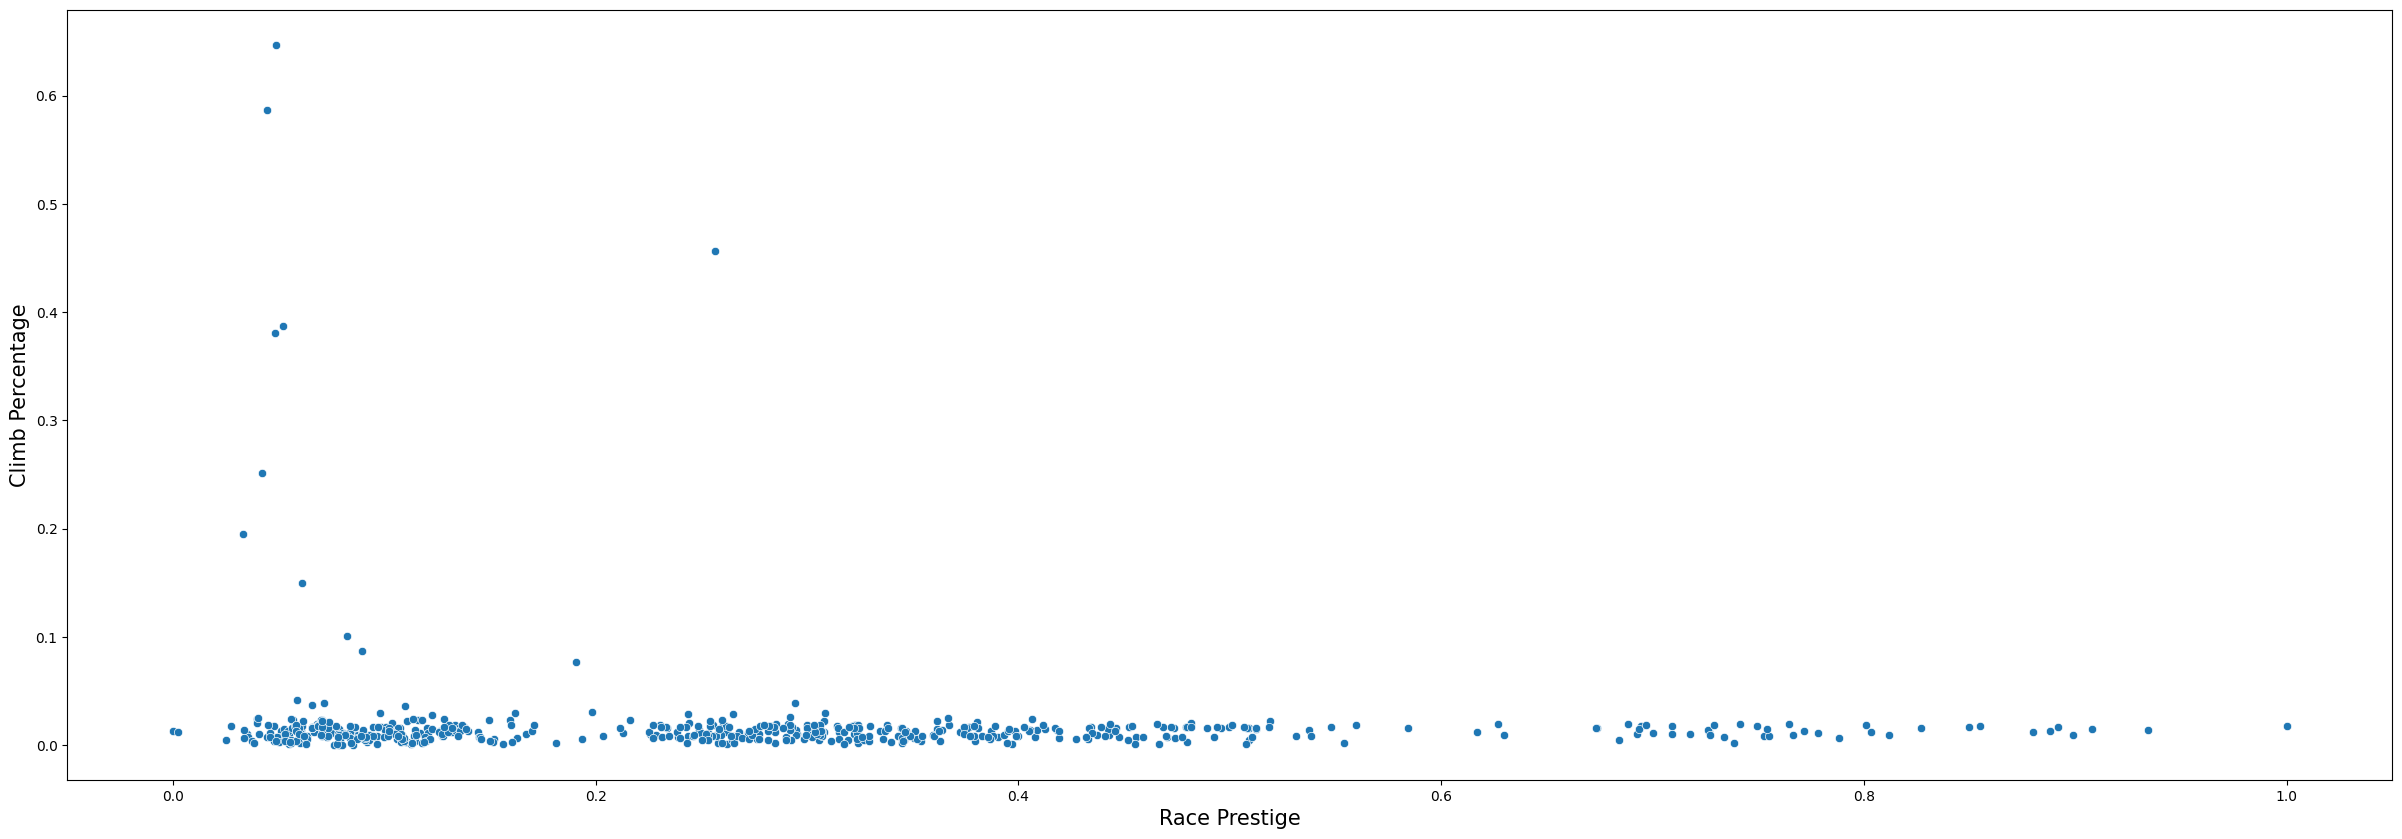

In [50]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='race_prestige',
    y='climb_percentage',
    data=tmp_df)
plt.xlabel('Race Prestige', fontsize=15)
plt.ylabel('Climb Percentage', fontsize=15)
plt.show()

However, the same does not apply to the climb percentage, implying that the total length of the race is still very influential

### Previous Experience

Text(-12.430555555555555, 0.5, 'Count')

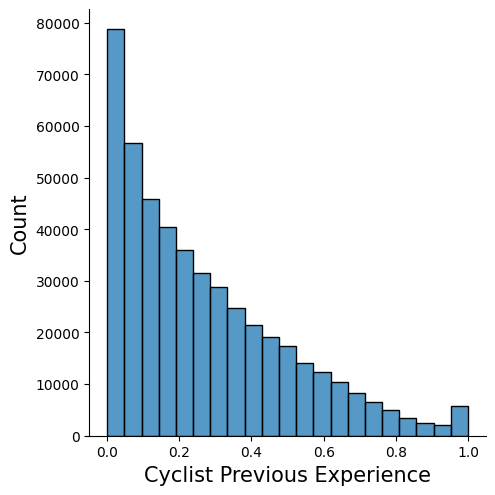

In [51]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset, 
                x="cyclist_previous_experience", 
                kind="hist",
                row_order="desc",
                bins=n_bins)
plt.xlabel('Cyclist Previous Experience', fontsize=15)
plt.ylabel('Count', fontsize=15)

There are many cyclists with "little" experience, probably due to the fact that many cyclists appear in few stages

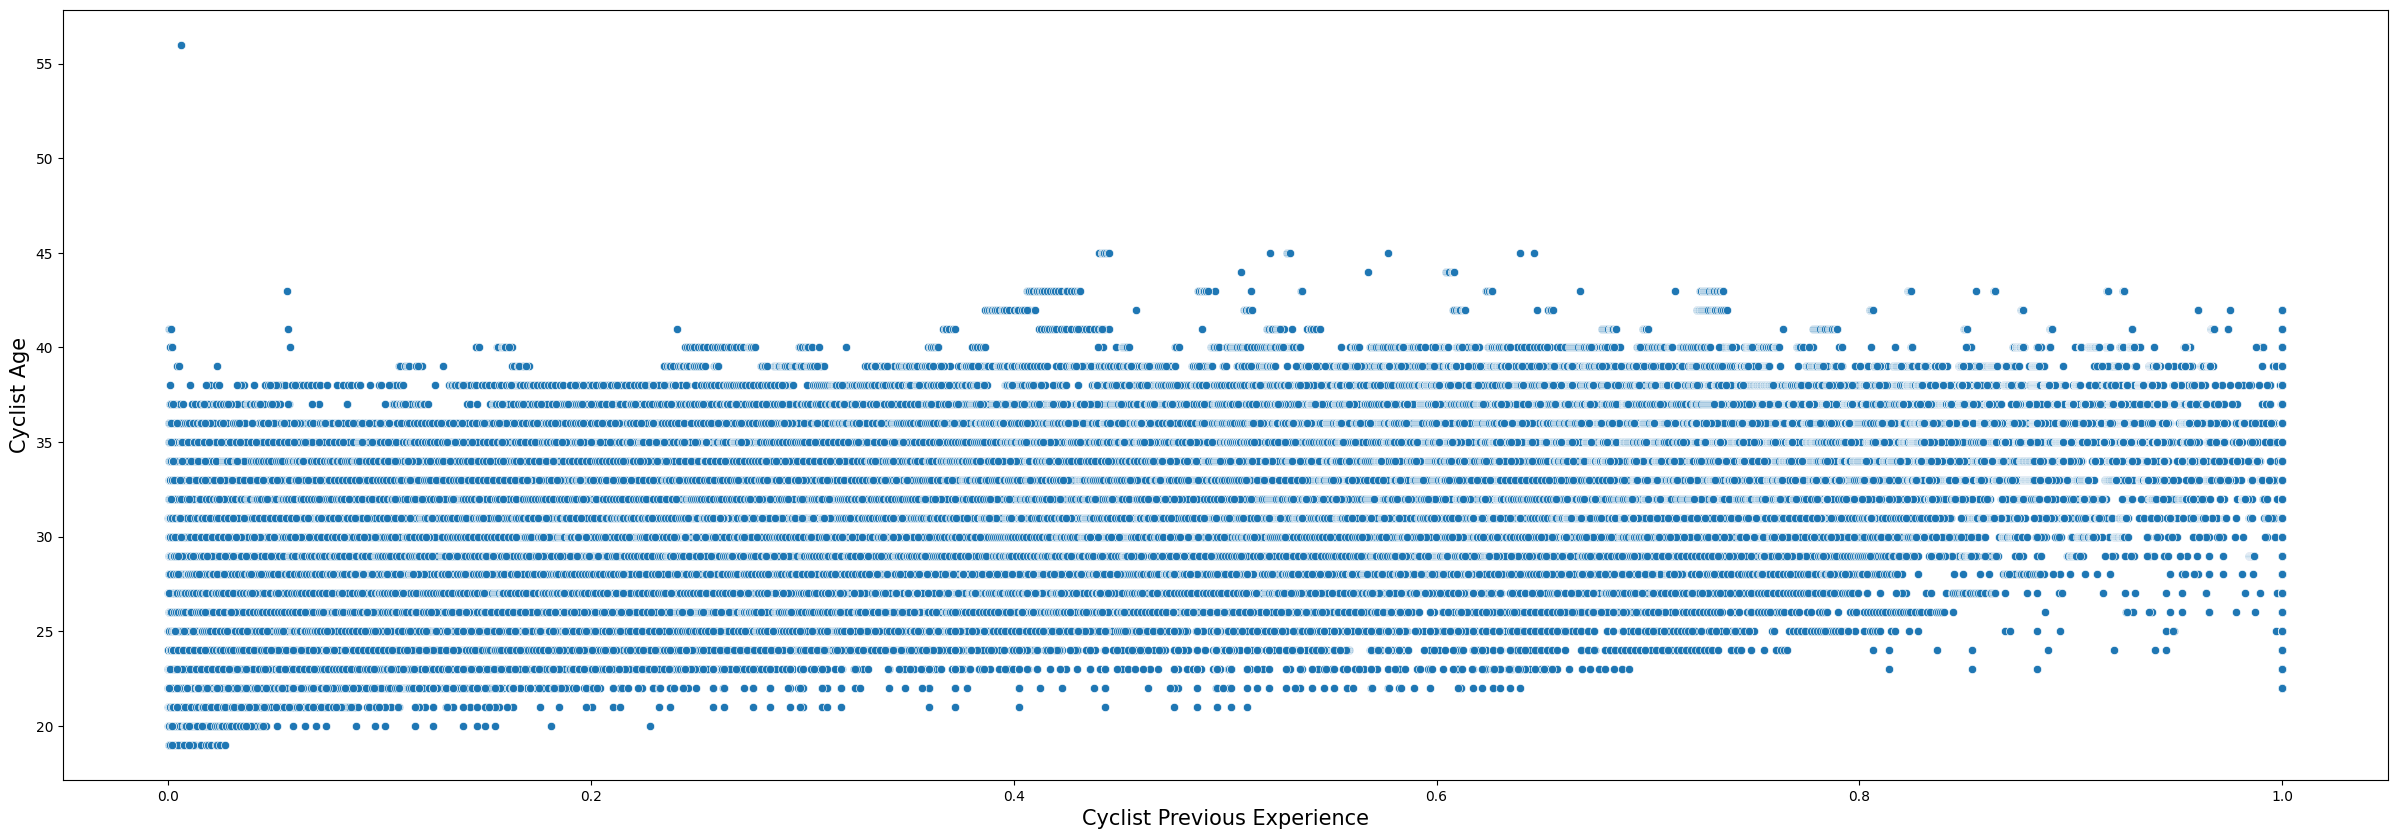

In [52]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_previous_experience',
    y='cyclist_age',
    data=dataset)
plt.xlabel('Cyclist Previous Experience', fontsize=15)
plt.ylabel('Cyclist Age', fontsize=15)
plt.show()

From the graph, we can see a slight correlation between the cyclist's age and their experience. In fact, there are few young cyclists with a lot of experience.

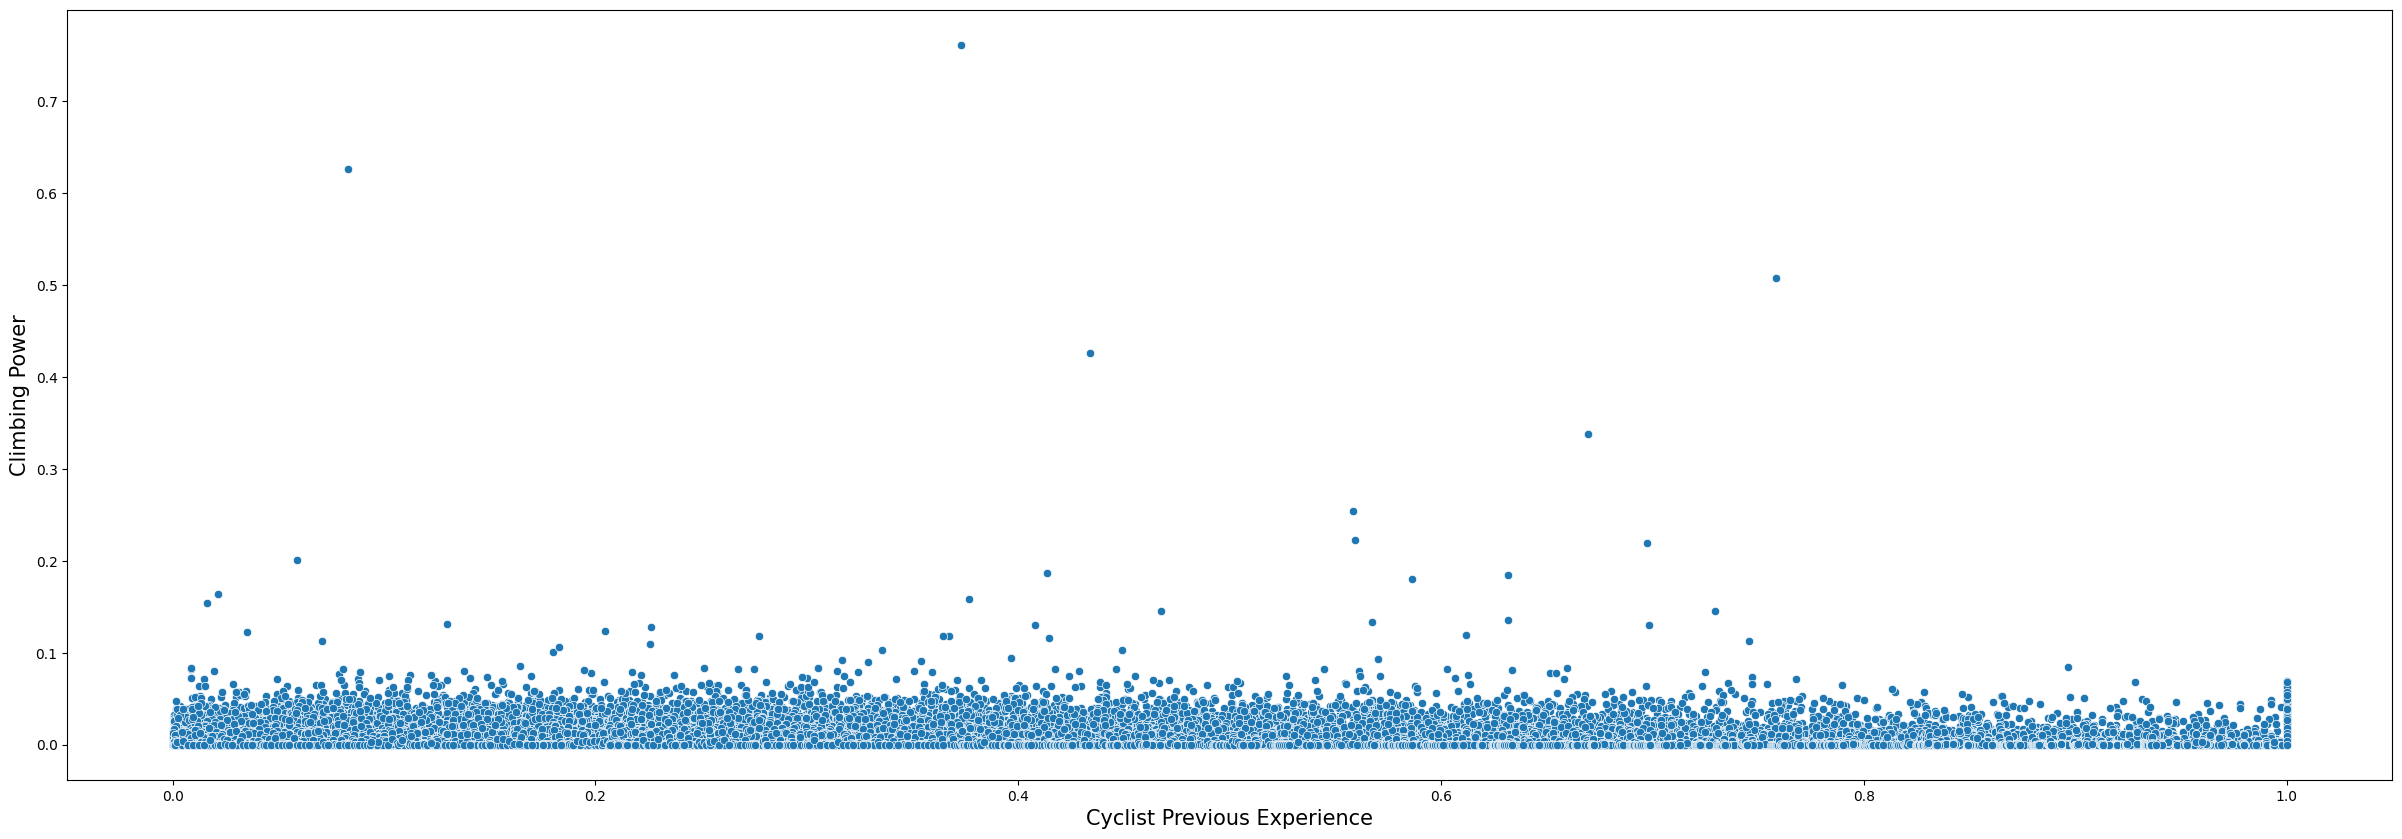

In [53]:
plt.figure(figsize=(30, 10))
sb.scatterplot(
    x='cyclist_previous_experience',
    y='cyclist_climb_power',
    data=dataset)
plt.xlabel('Cyclist Previous Experience', fontsize=15)
plt.ylabel('Climbing Power', fontsize=15)
plt.show()

From the graph, it seems that the more experience you have, the more the "climb power" tends to decrease, but this is probably a bias due to the low presence of cyclists with a lot of experience.

### Feature Correlation

In [54]:
normalized_dataset_races, normalization_scalers_races = center_and_scale(dataset)
corr_merged = correlations(normalized_dataset_races)
corr_merged

birth_year    weight    height    points  \
birth_year                     1.000000 -0.045815  0.084267 -0.188950   
weight                        -0.045815  1.000000  0.563195  0.053643   
height                         0.084267  0.563195  1.000000  0.011802   
points                        -0.188950  0.053643  0.011802  1.000000   
uci_points                     0.343416  0.030793  0.058356  0.550895   
...                                 ...       ...       ...       ...   
previous_mean_position         0.068560  0.252472  0.186838 -0.035598   
previous_mean_delta            0.395733  0.350317  0.248058 -0.065299   
previous_mean_cp              -0.147410 -0.128169 -0.075381 -0.017249   
cyclist_previous_experience   -0.261153 -0.011978 -0.038892  0.081840   
num_participants               0.200389 -0.015466  0.012782  0.095203   

                             uci_points    length  climb_total   profile  \
birth_year                     0.343416 -0.063052     0.045471  0.124779   
weight                         0.030793  0.032437    -0.020882 -0.032249   
height                         0.058356  0.009892    -0.004051 -0.000033   
points                         0.550895  0.283126     0.047106 -0.075127   
uci_points                     1.000000  0.171325     0.062417  0.030337   
...                                 ...       ...          ...       ...   
previous_mean_position        -0.023782  0.000699    -0.023565 -0.009889   
previous_mean_delta            0.171602 -0.019698     0.043469  0.089377   
previous_mean_cp              -0.162306 -0.010354     0.015293  0.005845   
cyclist_previous_experience    0.042634 -0.004027     0.025796  0.024902   
num_participants              -0.050742 -0.017889    -0.136535 -0.147509   

                             startlist_quality  position  ...  race_prestige  \
birth_year                           -0.143592  0.005725  ...      -0.156955   
weight                                0.038300  0.095103  ...       0.047797   
height                                0.007022  0.065440  ...       0.010506   
points                                0.387596  0.000005  ...       0.791818   
uci_points                            0.100071 -0.000002  ...       0.411640   
...                                        ...       ...  ...            ...   
previous_mean_position               -0.076786  0.460848  ...      -0.051217   
previous_mean_delta                  -0.062106  0.307534  ...      -0.054143   
previous_mean_cp                      0.092831 -0.256422  ...       0.014446   
cyclist_previous_experience           0.107657 -0.157443  ...       0.084304   
num_participants                      0.368701  0.000107  ...       0.222939   

                             mean_cyclist_cp  mean_delta  mean_position  \
birth_year                          0.165551    0.272604       0.022847   
weight                             -0.102569    0.280702       0.219858   
height                             -0.059748    0.187973       0.152147   
points                             -0.115152   -0.057531      -0.020512   
uci_points                         -0.109383    0.089193      -0.018839   
...                                      ...         ...            ...   
previous_mean_position             -0.412477    0.635920       0.867711   
previous_mean_delta                -0.179547    0.836665       0.602135   
previous_mean_cp                    0.781627   -0.441338      -0.475183   
cyclist_previous_experience         0.269857   -0.279206      -0.350978   
num_participants                    0.113338    0.133234       0.016772   

                             previous_mean_position  previous_mean_delta  \
birth_year                                 0.047060             0.275515   
weight                                     0.173576             0.242428   
height                                     0.128401             0.171328   
points                                    -0.026847            -0.048761 

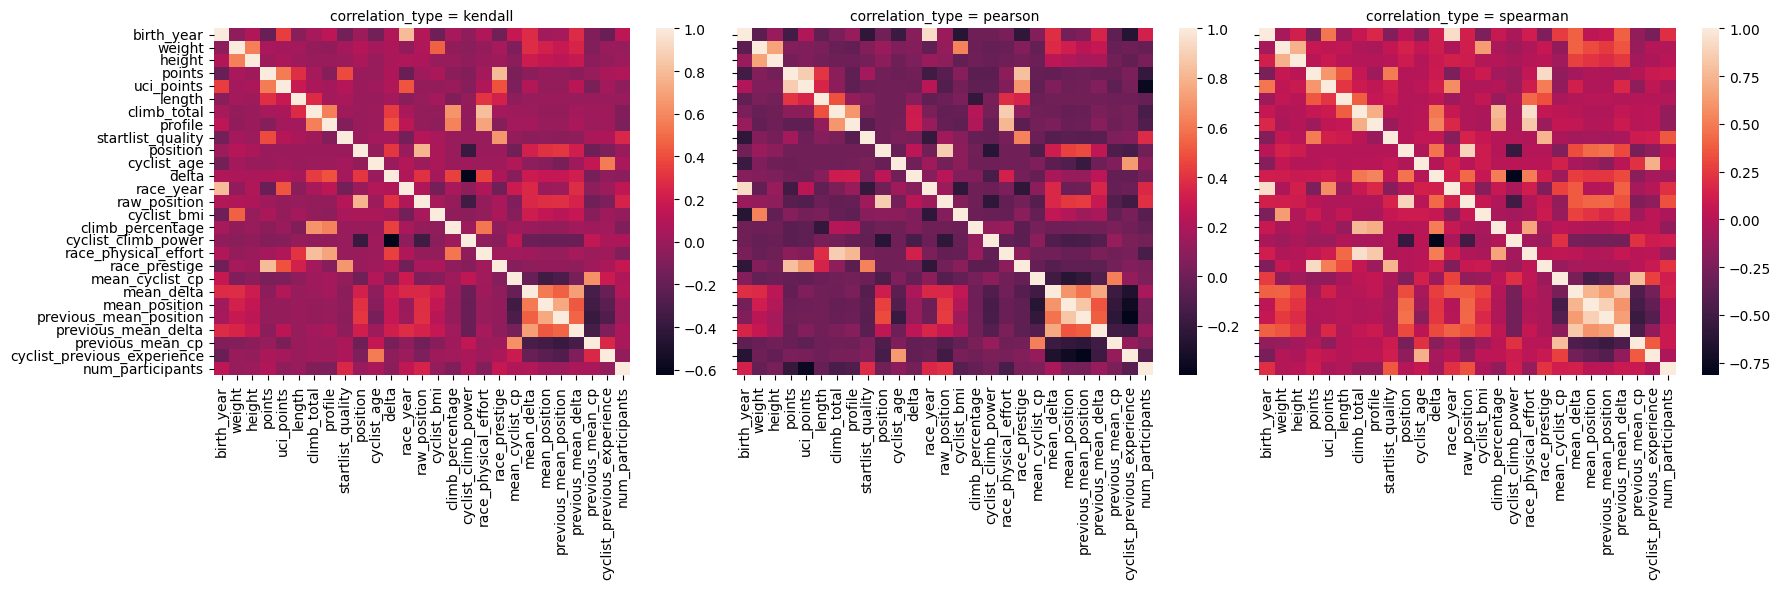

In [55]:
plt.rcParams.update({'font.size': 10})

g = sb.FacetGrid(corr_merged, col="correlation_type", height=6)
g.map_dataframe(lambda data, color: sb.heatmap(data[data.columns[:-1]]))